Finally, the Kaggle 2017 Survey results are out. This survey can provide very meaningful insights (almost everything) about the people working in the field of Data Science. 

In this notebook, I will try to explore different things within the data. I will cover some simple to intermediate techniques to explore and visualize the data. If you are new to Kaggle or if you have some basic/intermediate EDA skills, then this notebook is  a head start for you. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
import re
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sst
from collections import defaultdict
color = sns.color_palette()
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

RespondentTypeREADME.txt
conversionRates.csv
freeformResponses.csv
multipleChoiceResponses.csv
schema.csv



In [2]:
# Read each of the file
cvRates = pd.read_csv('../input/conversionRates.csv', encoding="ISO-8859-1")
freeForm = pd.read_csv('../input/freeformResponses.csv', encoding="ISO-8859-1")
multiChoice = pd.read_csv('../input/multipleChoiceResponses.csv', encoding="ISO-8859-1")
schema = pd.read_csv('../input/schema.csv', encoding="ISO-8859-1")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,17,21,38,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Check the schema first
schema.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
# Let's check the multiple response file first where each row corresponds to all answers 
# given by a single person
multiChoice.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will select each column and try to explore as much as possible,

# **Diversity**

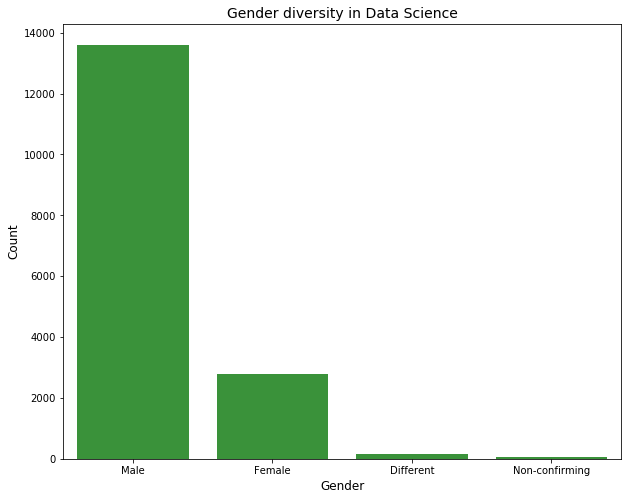

In [5]:
# Checking the diversity first
gender_count = multiChoice.GenderSelect.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=gender_count.index, y= gender_count.values, color=color[2])
plt.title('Gender diversity in Data Science', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(gender_count.index)), ['Male', 'Female', 'Different', 'Non-confirming'])
plt.show()

Woah!! This ratio is disturbing. I am actually surprised seeing such a low number of females working in DS even in 2017.

In [6]:
total_surveys = gender_count.values.sum()
for i, idx in enumerate(gender_count.index):
    num_survey = gender_count.values[i]
    percentage = (num_survey/total_surveys)*100
    print("Number of surveys done by {} are {} which corresponds to {:.2f}% of the total surveys taken".format(idx, num_survey, percentage))

Number of surveys done by Male are 13610 which corresponds to 81.88% of the total surveys taken
Number of surveys done by Female are 2778 which corresponds to 16.71% of the total surveys taken
Number of surveys done by A different identity are 159 which corresponds to 0.96% of the total surveys taken
Number of surveys done by Non-binary, genderqueer, or gender non-conforming are 74 which corresponds to 0.45% of the total surveys taken


## **Country-wise survey**

In [7]:
# There are a lot of null values in this column. I am going to replace them with "others" for now.
multiChoice['Country'] = multiChoice['Country'].fillna("Others")

In [8]:
# Get the count of people in data science per country
country_count = multiChoice['Country'].value_counts()
print("Maximum number of surveys taken {} by {}: ".format(country_count.values[0], country_count.index[0]))
print("Minimum number of survesy taken {} by {}: ".format(country_count.values[-1], country_count.index[-1]))
print("Average number of surveys : ", format(round(country_count.values.mean())))
print("Number of countries where the surveys count was less than the average survey count: ", end=" ")
print(country_count[country_count.values < country_count.values.mean() ].count())

Maximum number of surveys taken 4197 by United States: 
Minimum number of survesy taken 51 by Chile: 
Average number of surveys :  315.0
Number of countries where the surveys count was less than the average survey count:  41


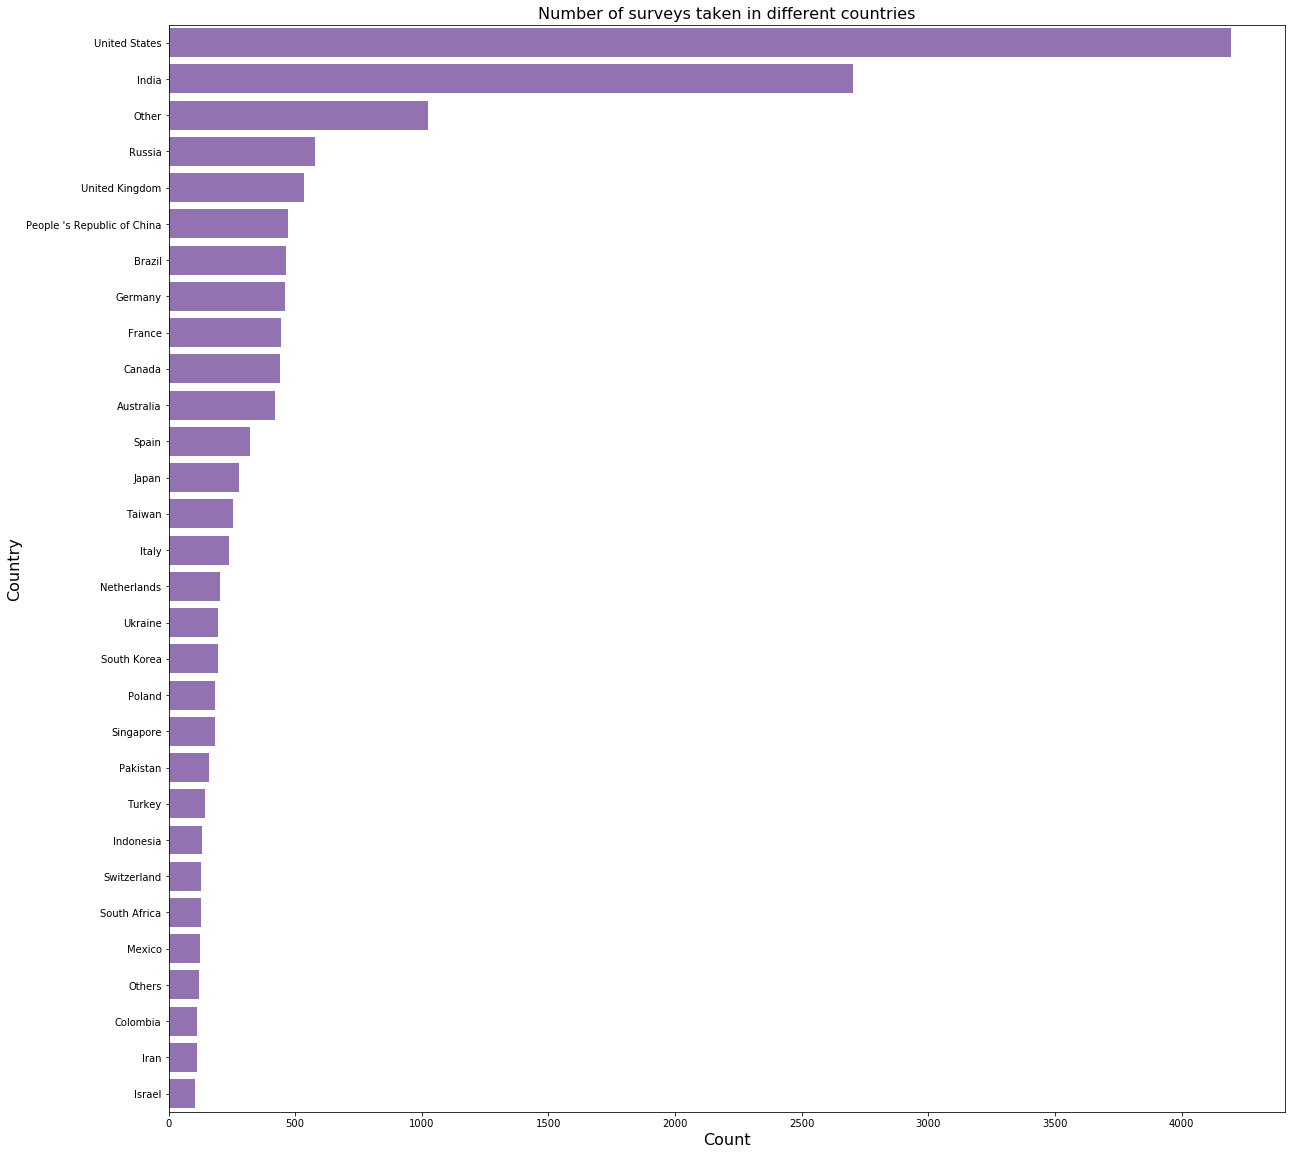

In [9]:
# For the sake of a good plot, I will be excluding all those countries from the graph
# where the number of surveys is less 100
country_count_ex = country_count[country_count.values > 100]
plt.figure(figsize=(20,20))
sns.barplot(y=country_count_ex.index, x= country_count_ex.values, color=color[4], orient='h')
plt.title('Number of surveys taken in different countries', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.show()

So, most of the people working in the field of data science are based in United States followed by India, Russia and United Kingdom. It's a surprise that countries like Germany, China and Japan are lagging behind here.


# **Age**

Anyways, let's move to the Age column now. This will be interesting. These are the steps that we are going to follow:
* Check for any null values. Replace them with mean, median or mode age.
* Check for the age count. Find the min, max and average age of the people working in DS
* Will try to group by countries and do a country-wise analysis too.

In [10]:
# A handy-dandy function
def check_age(data):
    print("Null values count: ", data.isnull().sum())
    print("Minimum age: ", data.min())
    print("Maximum age: ", data.max())
    print("Average age: ", data.mean())
    print("Median age: ", np.median(data.values))
    print("Mode age: ", sst.mode(data.values))

In [11]:
check_age(multiChoice['Age'])

Null values count:  331
Minimum age:  0.0
Maximum age:  100.0
Average age:  32.37284101312176
Median age:  nan
Mode age:  ModeResult(mode=array([ 25.]), count=array([969]))


/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


There are a total of 331 null values here. Also, as expected, people have filled age upto 100. We will cap the age at 60 as I don't think it matters that much after 60. Also, we will copy the original data into a series so that we can use our original data for some other purpose later on.

In [12]:
# Copy the series
age = multiChoice['Age']
# Drop the null values
age = age.dropna()
# Drop values > 60 and < 10
age = age.drop(age.index[(age.values > 60) | (age.values < 10)]).reset_index(drop=True)
# Check for the stats again
check_age(age)

Null values count:  0
Minimum age:  10.0
Maximum age:  60.0
Average age:  31.724208821330674
Median age:  30.0
Mode age:  ModeResult(mode=array([ 25.]), count=array([969]))


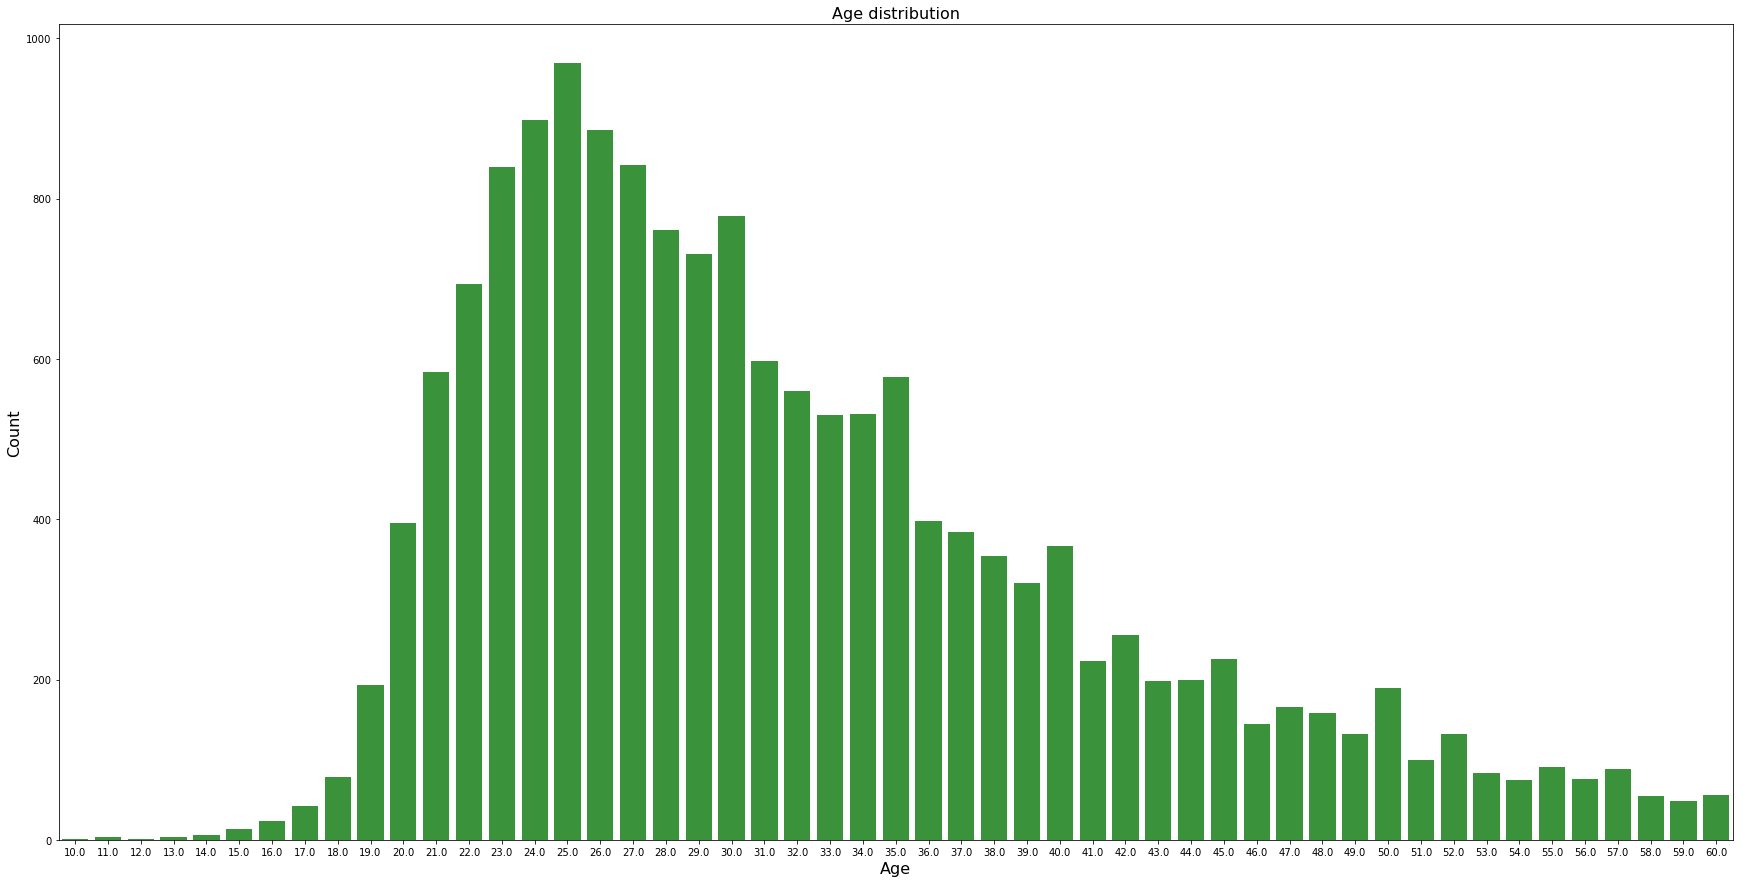

In [13]:
age_count = age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values, color=color[2])
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution',fontsize=16)
plt.show()

Maximum people doing DS are somewhat between 19-35. Let's see what's the age difference between the top two countries 

In [14]:
age_country = multiChoice[['Country', 'Age']]
# Drop the null values
age_country = age_country.dropna()
# Drop values > 60 and < 10
age_country = age_country.drop(age_country.index[(age_country['Age'] > 60) | (age_country['Age'] < 10)]).reset_index(drop=True)

======== USA ==============
Null values count:  0
Minimum age:  13.0
Maximum age:  60.0
Average age:  34.017530487804876
Median age:  31.0
Mode age:  ModeResult(mode=array([ 25.]), count=array([220]))

======= India ============
Null values count:  0
Minimum age:  14.0
Maximum age:  60.0
Average age:  27.509145203434116
Median age:  25.0
Mode age:  ModeResult(mode=array([ 21.]), count=array([234]))


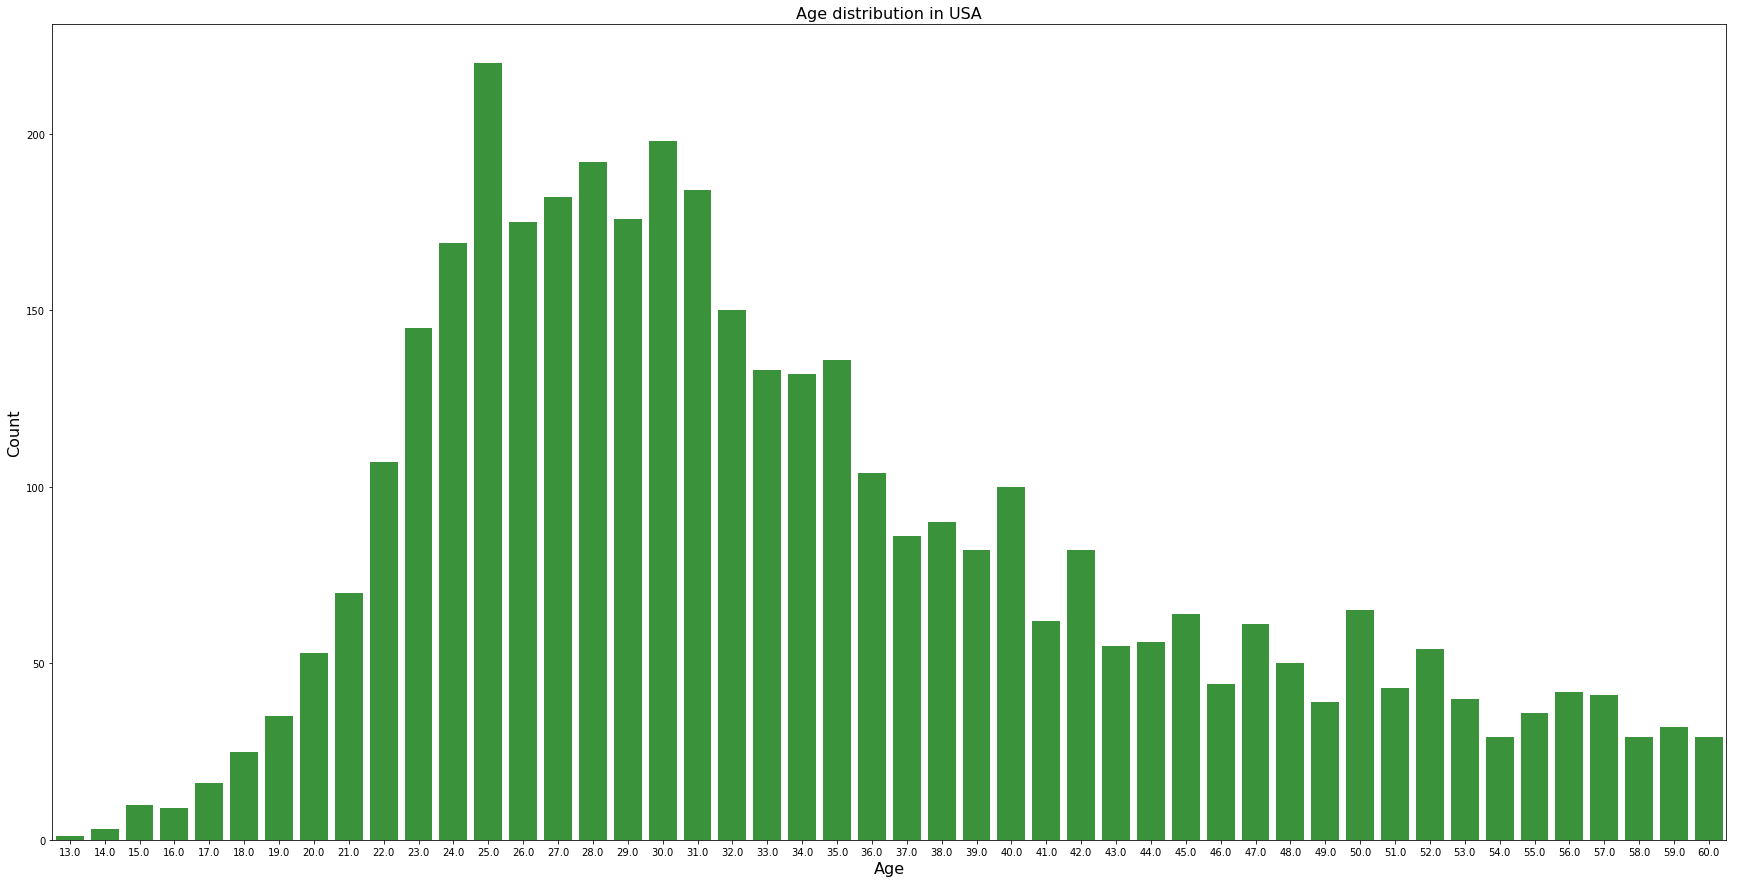

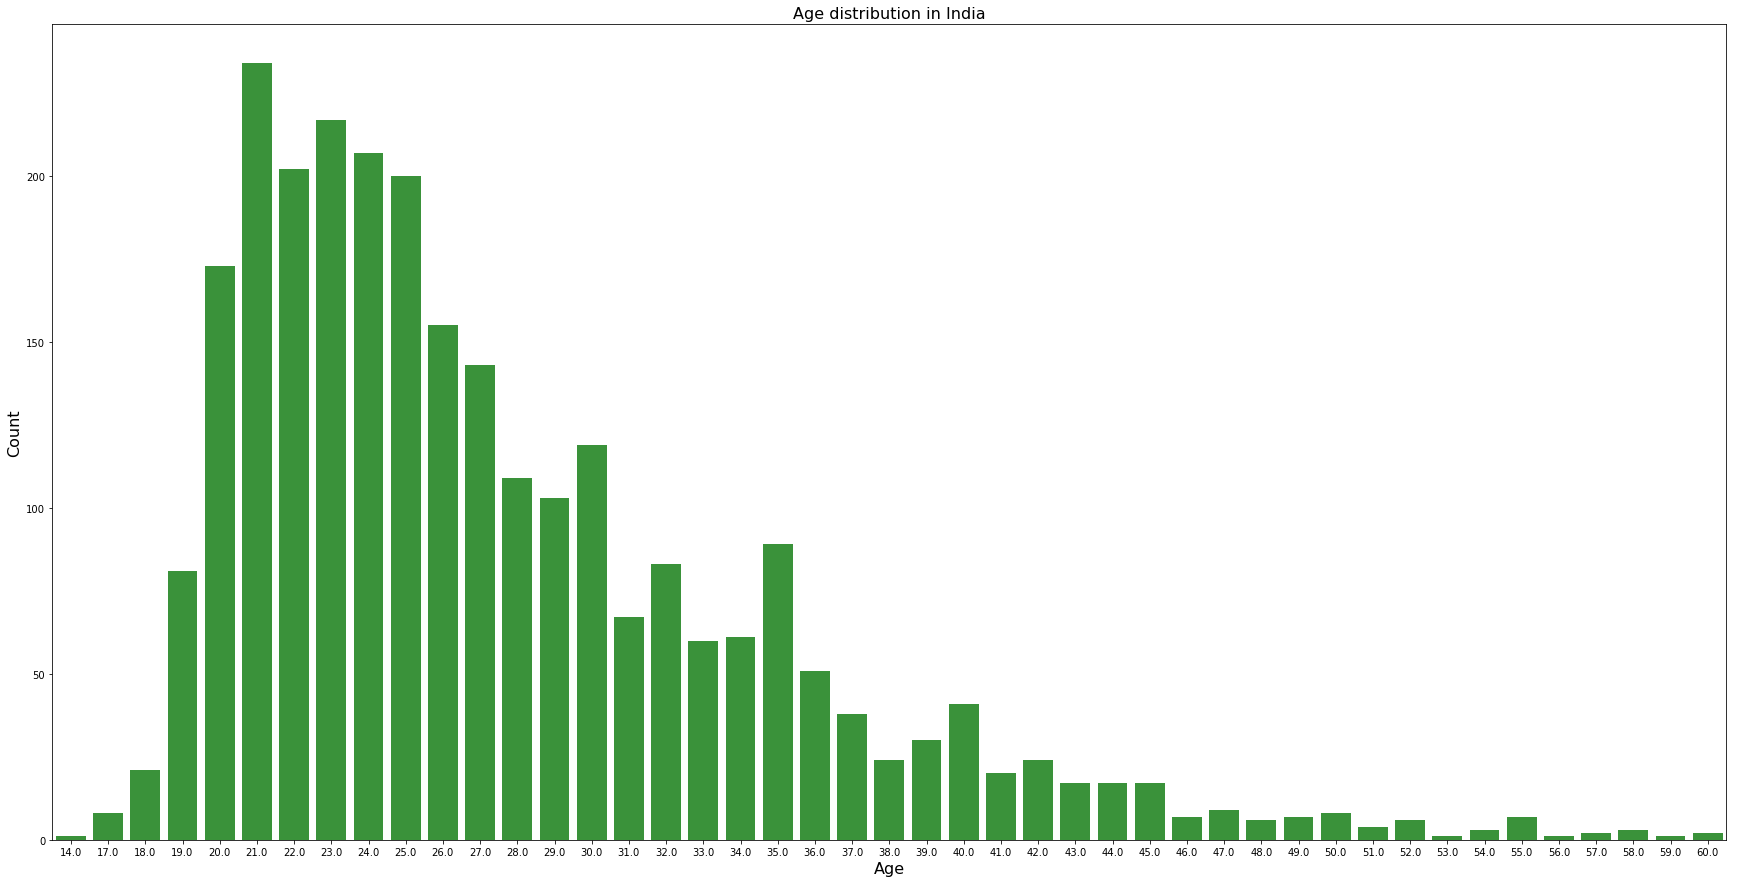

In [15]:
# Get USA and India from the groups
age_USA = age_country.groupby('Country').get_group('United States')
age_India = age_country.groupby('Country').get_group('India')

# Stats
print("======== USA ==============")
check_age(age_USA['Age'])
print("")
print("======= India ============")
check_age(age_India['Age'])

# Count and plot 
age_count = age_USA.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values, color=color[2])
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution in USA',fontsize=16)
plt.show()


age_count = age_India.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values, color=color[2])
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution in India',fontsize=16)
plt.show()

This is so cool. While the minimum age in USA is less than minimum age in India but the mode age in India is much better as compared to USA. In USA, maximum people doing DS are of age 25-35 while in India it is between 21-27. Nice.

# **Employment Status**

Total number of Employed full-time is 10897  approx.  65.19%
Total number of Not employed, but looking for work is 2110  approx.  12.62%
Total number of Independent contractor, freelancer, or self-employed is 1330  approx.  7.96%
Total number of Not employed, and not looking for work is 924  approx.  5.53%
Total number of Employed part-time is 917  approx.  5.49%
Total number of I prefer not to say is 420  approx.  2.51%
Total number of Retired is 118  approx.  0.71%


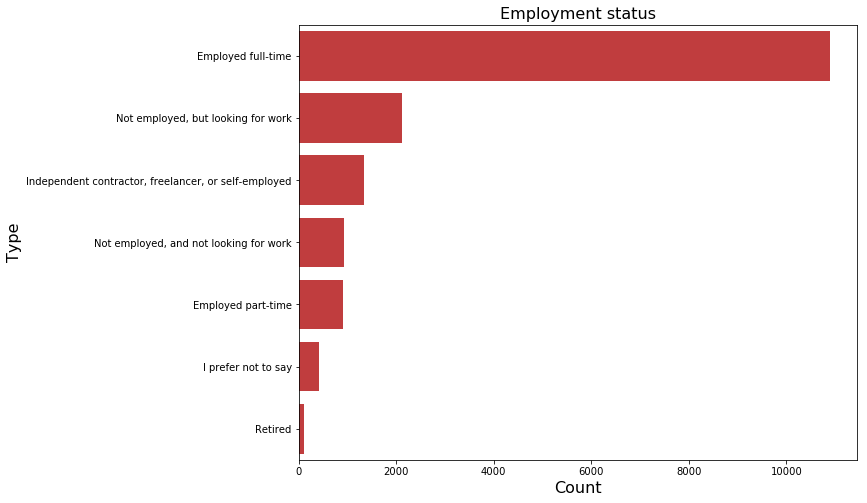

In [16]:
employment = multiChoice['EmploymentStatus'].value_counts()
total = employment.values.sum()
for i, idx in enumerate(employment.index):
    val = employment.values[i]
    percent = (val/total)*100
    print("Total number of {} is {}  approx.  {:.2f}%".format(idx, val, percent))
    
plt.figure(figsize=(10,8))
sns.barplot(y=employment.index, x= employment.values, color=color[3], orient='h')
plt.title('Employment status', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Type', fontsize=16)
plt.show()    

Most of the people are employed full time which is obvious given the demand now-a-days. The most interesting are the ones who are not employed and still not looking for work. (Attitude!!)

Again, we will look at the employment status in the two major countries i.e. United States and India. This is gonna be interesting...LOL!!

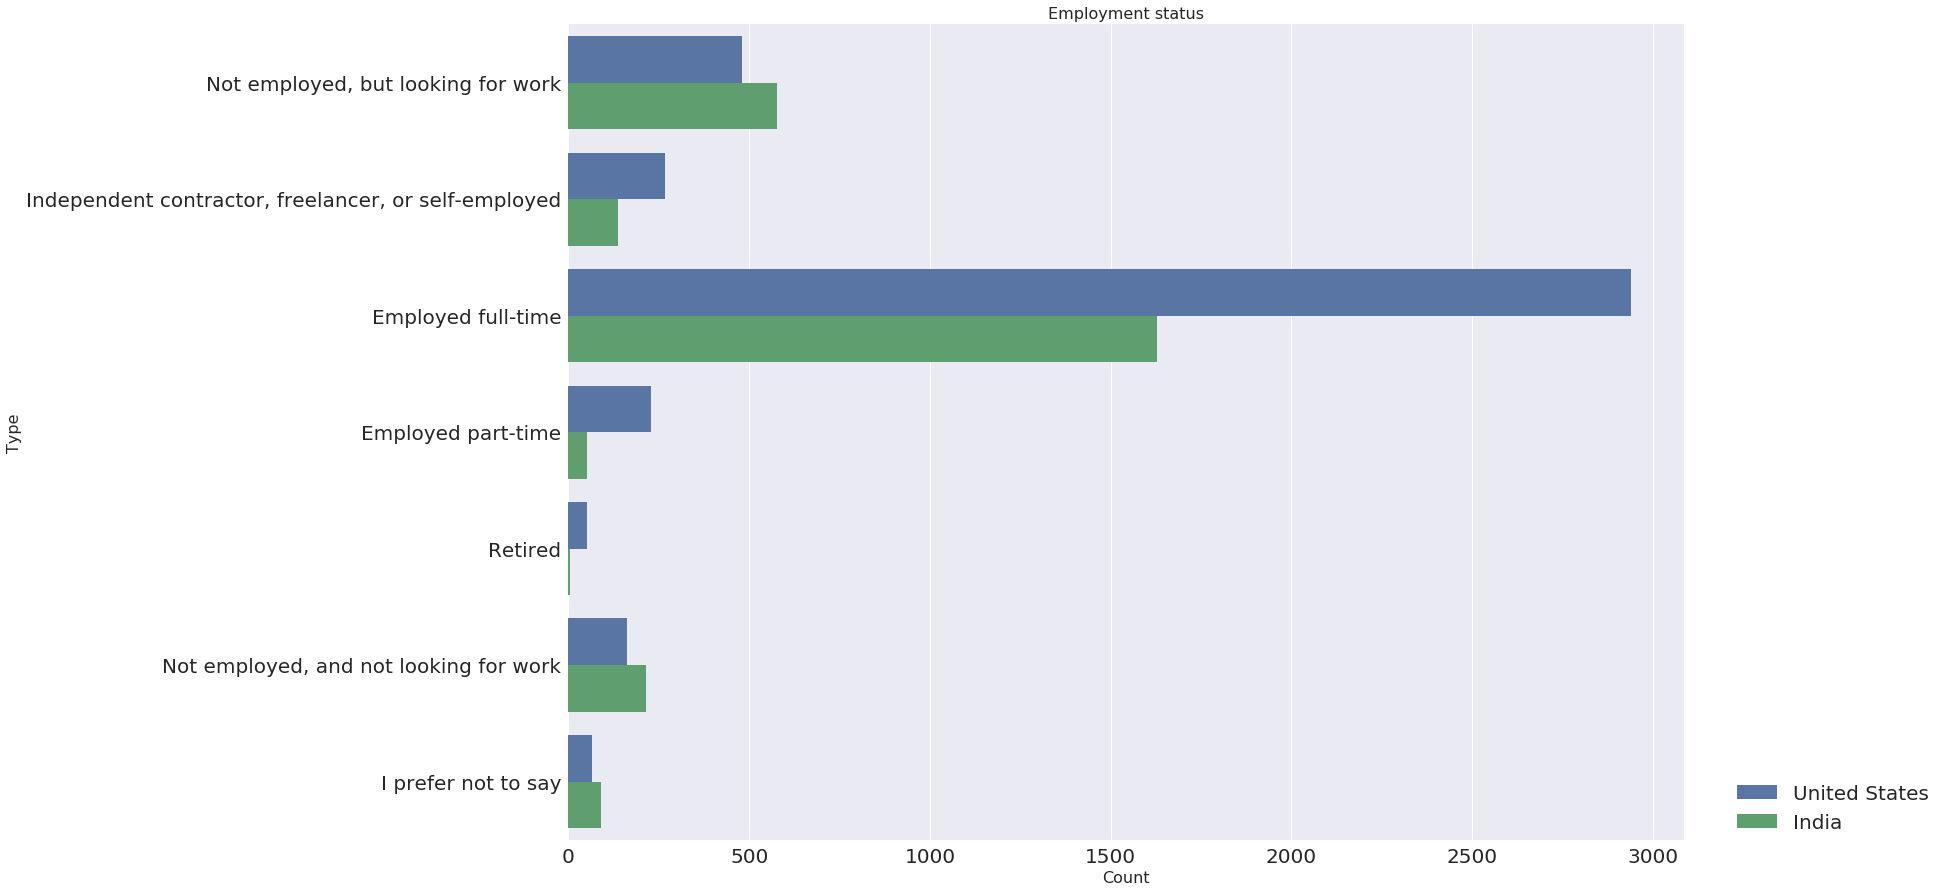

In [17]:
emp_country = multiChoice[['Country', 'EmploymentStatus']]

# Get USA and India from the groups
emp_USA = emp_country.groupby('Country').get_group('United States')
emp_India = emp_country.groupby('Country').get_group('India')
emp_country = pd.concat([emp_USA, emp_India]).reset_index(drop=True)
del emp_USA, emp_India

# Count and plot 
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(y=emp_country['EmploymentStatus'],orient='h', data=emp_country, hue='Country')
plt.title('Employment status', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Type', fontsize=16)
plt.legend(loc=(1.04,0))
plt.show()

As expected, the number of employed-full time in US is almost double the number in India. Also, the number of freelancers are less in India but the number of people who are not employed and still not looking for work is higher as compared to US

# **StudentStatus** 

Student?: Yes How many?: 981  or roughly 76.64% of the total
Student?: No How many?: 299  or roughly 23.36% of the total


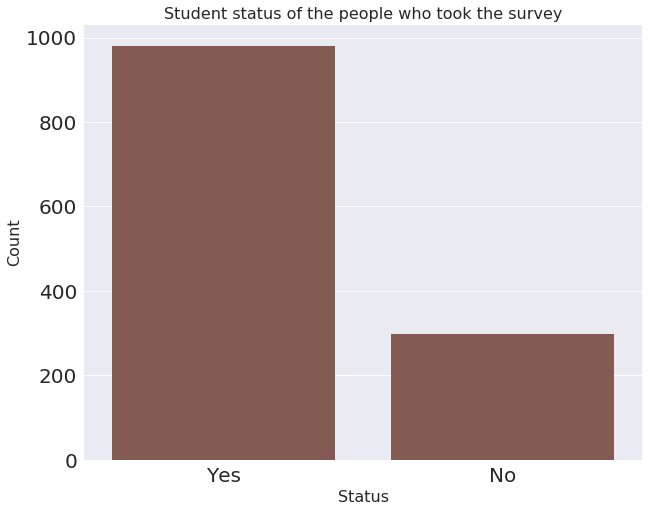

In [18]:
# How many people, who took the survey, are students?
students = multiChoice['StudentStatus']

# We will drop the NaN values from this column because we just can't say whether a person who
# took the survey is student or not 
students.dropna(inplace=True)

students_count = students.value_counts()
total = multiChoice['StudentStatus'].shape[0]
del students

for i, idx in enumerate(students_count.index):
    val = students_count.values[i]
    percentage = (val/total)*100
    print("Student?: {} How many?: {}  or roughly {:.2f}% of the total".format(idx, val, percentage))
    
plt.figure(figsize=(10,8))
sns.barplot(x=students_count.index, y=students_count.values, color=color[5])
plt.title("Student status of the people who took the survey", fontsize=16)
plt.xlabel("Status", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.xticks(range(len(students_count.index)), students_count.index)
plt.show()

So, there are a lot of students as per the survey. Let's check how this holds up for the top two countries: US and India. If I am not wrong, there would be more students in India as compared to US.

Maximum number of students in any country:  ('India', 240)
Minimum number of students in any country:  ('Israel', 1)


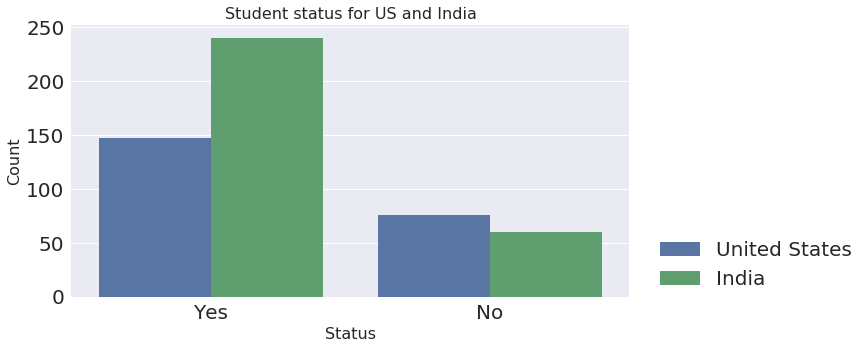

In [19]:
# Choose the required column
student_country = multiChoice[['Country', 'StudentStatus']]
# Drop the rows with null values 
student_country = student_country.dropna()
student_group = student_country.groupby('Country')

# Check which country has the highes and lowest number of students
students_count = [(None, 0)]
for group, df in student_group:
    count = df['StudentStatus'].value_counts()
    try:
        if count.index[0]=='Yes':
            yes = count.values[0]
            students_count.append((group, yes))
        elif count.index[1]=='Yes':
            yes = count.values[1]
            students_count.append((group, yes))
    except:
        pass
students_count.sort(key = lambda x: x[1], reverse=True)
print("Maximum number of students in any country: ", students_count[0])
print("Minimum number of students in any country: ", students_count[-2])
del students_count

# get US and India
student_US = student_group.get_group('United States')
student_India =  student_group.get_group('India')

student_country = pd.concat([student_US, student_India]).reset_index(drop=True)
del student_US, student_India

plt.figure(figsize=(10,5))
sns.countplot(x=student_country['StudentStatus'], data=student_country, hue='Country')
plt.title('Student status for US and India', fontsize=16)
plt.xlabel('Status', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(loc=(1.04,0))
plt.show()

So, my assumption was right. In India, there are almost 1.5x students as compared to US. This is so common. And the reason behind it is that, no matter what, almost everyone is calling themselves as **Data Scientist**

### How many people are learning data science skills?

Yes, I'm focused on learning mostly data science skills: 800  which is roughly 62.31% 
Yes, but data science is a small part of what I'm focused on learning: 429  which is roughly 33.41% 
No, I am not focused on learning data science skills: 55  which is roughly 4.28% 


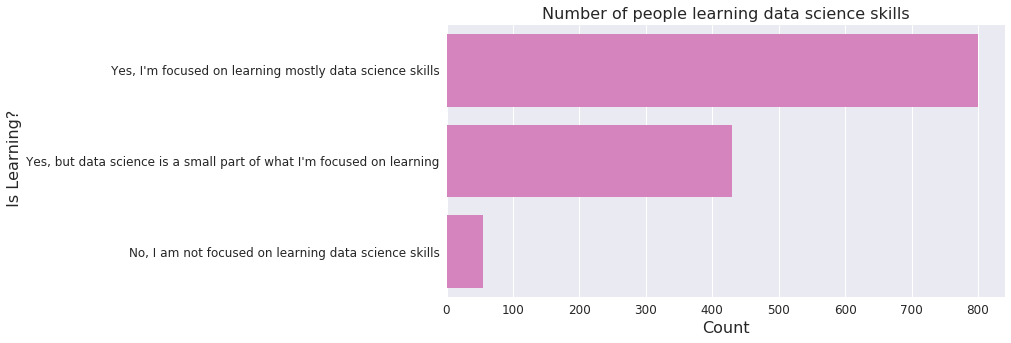

In [20]:
# How many are learning Data Sciece?
learning = multiChoice['LearningDataScience'].dropna()
learning_count = learning.value_counts()

for i, idx in enumerate(learning_count.index):
    val = learning_count.values[i]
    percent = (val/learning.shape[0])*100
    print("{}: {}  which is roughly {:.2f}% ".format(idx, val, percent))
    
plt.figure(figsize=(10,5))
sns.set(font_scale=1.2)
sns.barplot(x=learning_count.values, y=learning_count.index, orient='h', color=color[6])
plt.title("Number of people learning data science skills", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.ylabel(" Is Learning?", fontsize=16)
plt.show()

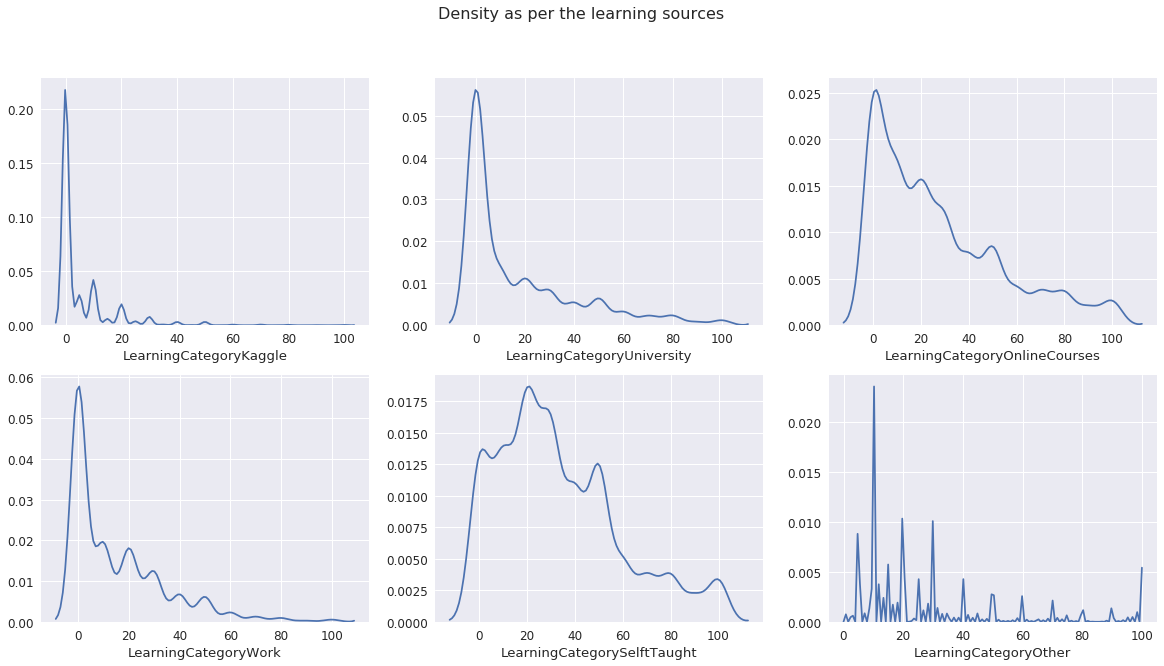

In [21]:
# There are a number of categories of learning as asked and answered in the survey
#Let's check the distribution of all the sources of learning

# How many are doing Kaggle?
kaggle = multiChoice['LearningCategoryKaggle'].dropna()

# How many are taking courses at a University?
university= multiChoice['LearningCategoryUniversity'].dropna()

# How many are doing online courses?
online = multiChoice['LearningCategoryOnlineCourses'].dropna()

# How many are learning at work?
work = multiChoice['LearningCategoryWork'].dropna()

# How many are self-taught?
self_taught = multiChoice['LearningCategorySelftTaught'].dropna()

# How many learn from other sources(Youtube, Meetups, etc)?
other = multiChoice['LearningCategoryOther'].dropna()


learning_category = [kaggle, university, online, work, self_taught, other]

f,axs = plt.subplots(2,3, figsize=(20,10))

for i, catg in enumerate(learning_category):
    sns.distplot(catg, ax=axs[i//3, i%3], hist=False)

f.suptitle("Density as per the learning sources", fontsize=16)
plt.show()    

# Job Specific questions 

These questions were basically asked for those persons who are partly/fully employed. I will take each column one by one and I will not analyze all the columns as of now but will pick up the interesting ones

### Job title

Data Scientist                          : 2433 or 20.57%
Software Developer/Software Engineer    : 1759 or 14.87%
Other                                   : 1233 or 10.42%
Data Analyst                            : 1213 or 10.25%
Scientist/Researcher                    : 978 or 8.27%
Business Analyst                        : 796 or 6.73%
Researcher                              : 619 or 5.23%
Machine Learning Engineer               : 617 or 5.22%
Engineer                                : 552 or 4.67%
Programmer                              : 462 or 3.91%
Computer Scientist                      : 335 or 2.83%
Statistician                            : 289 or 2.44%
DBA/Database Engineer                   : 187 or 1.58%
Predictive Modeler                      : 181 or 1.53%
Data Miner                              : 118 or 1.00%
Operations Research Practitioner        : 58 or 0.49%


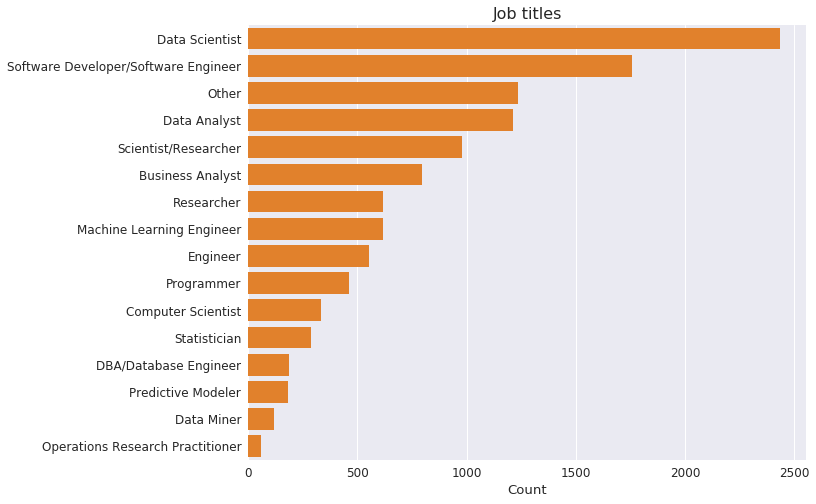

In [22]:
job_title = multiChoice['CurrentJobTitleSelect'].dropna()
title_count = job_title.value_counts()

for i in range(len(title_count)):
    title = title_count.index[i]
    count = title_count.values[i]
    percent = (count/len(job_title))*100
    print("{:<40s}: {} or {:.2f}%".format(title, count, percent))
    
f = plt.figure(figsize=(10,8))
sns.barplot(x=title_count.values, y=title_count.index, orient='h', color=color[1])
plt.title("Job titles", fontsize=16)
plt.xlabel("Count")
plt.show()

### Coders

How many of the above people write code in their day-to-day job?

Yes: 10153 approx. 77.00%
No: 3033 approx. 23.00%


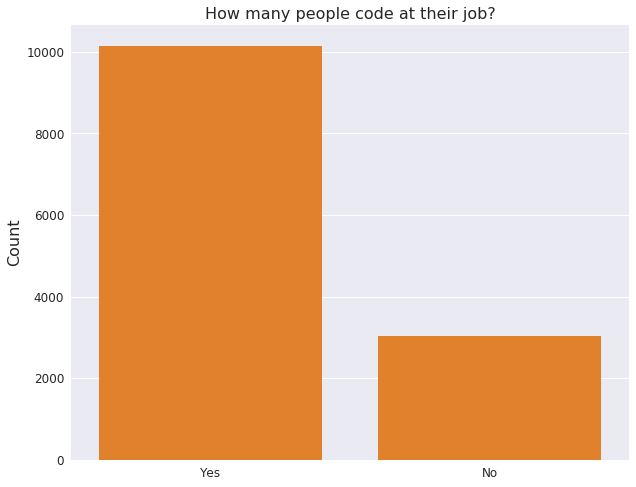

In [23]:
coders = multiChoice['CodeWriter'].dropna()
coders_count = coders.value_counts()

for i in range(len(coders_count)):
    coder = coders_count.index[i]
    count = coders_count.values[i]
    percent = (count/len(coders))*100
    print("{}: {} approx. {:.2f}%".format(coder, count, percent))
    
f = plt.figure(figsize=(10,8))
sns.barplot(x=coders_count.index, y=coders_count.values, orient='v', color=color[1])
plt.title("How many people code at their job?", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### Coding experience(in years)

1 to 2 years                            : 3424 --> approx. 25.30%
3 to 5 years                            : 3355 --> approx. 24.79%
Less than a year                        : 2380 --> approx. 17.59%
More than 10 years                      : 2028 --> approx. 14.99%
6 to 10 years                           : 1714 --> approx. 12.67%
I don't write code to analyze data      : 631 --> approx. 4.66%


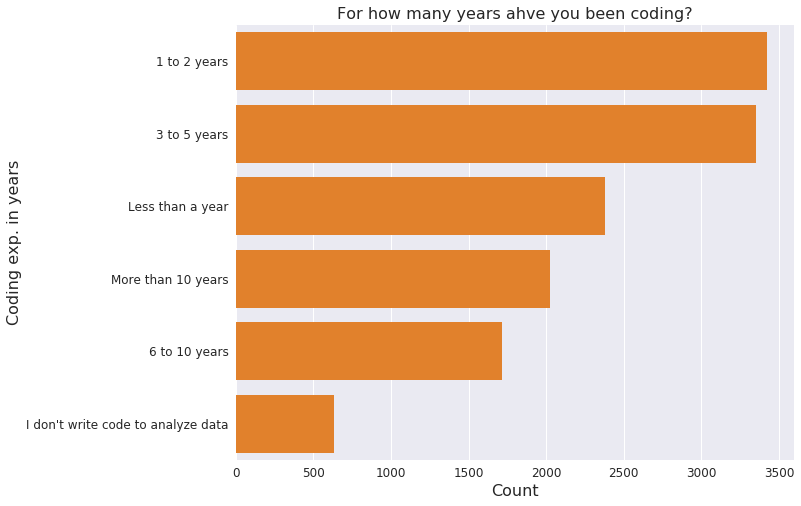

In [24]:
# Q. How long have you been writing code to analyze data?
coding_exp = multiChoice['Tenure'].dropna()
coding_exp_count = coding_exp.value_counts()

for i in range(len(coding_exp_count)):
    choice = coding_exp_count.index[i]
    count = coding_exp_count.values[i]
    percent = (count/len(coding_exp))*100
    print("{:<40s}: {} --> approx. {:.2f}%".format(choice, count, percent))
    

f = plt.figure(figsize=(10,8))
sns.barplot(y=coding_exp_count.index, x=coding_exp_count.values, orient='h', color=color[1])
plt.title("For how many years ahve you been coding?", fontsize=16)
plt.ylabel("Coding exp. in years", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show()

### Career Switch
How many people are thinking for a career switch to data science field?

In [25]:
career = multiChoice['CareerSwitcher'].dropna()
career_switch = career.value_counts()

for i in range(len(career_switch)):
    choice = career_switch.index[i]
    count = career_switch.values[i]
    percent = (count/len(career))*100
    print("{}: {} approx. {:.2f}%".format(choice, count, percent))

Yes: 2126 approx. 70.58%
No: 886 approx. 29.42%


Given the hype ML/DL has gained in the recent years, I was expecting more than 70% but 70% is fine too. This totally makes sense as a large number of companies are adopting DS now.

### TitleFit

This is an interesting one. I have seen that most of the recruiters(especially HR) don't fully understand the difference between the the job titles. For example, I have seen people putting titles at Linkedin like this: Full Stack Data Scientist. Also, some people wants a Data Scientist but mix it with the title of Business Analyst.

Let's check how mnay people think that their job title is adequate.

In [26]:
title_fit = multiChoice['TitleFit'].dropna()
title_fit_count = title_fit.value_counts()

for i in range(len(title_fit_count)):
    choice = title_fit_count.index[i]
    count = title_fit_count.values[i]
    percent = (count/len(title_fit))*100
    print("{}: {} --- approx. {:.2f}%".format(choice, count, percent))

Fine: 7501 --- approx. 65.20%
Perfectly: 2305 --- approx. 20.04%
Poorly: 1698 --- approx. 14.76%


This is bad. And I will tell you why. Even though 65% people say the title is fine but it is not very cler what a person actually means when he/she says "fine". For example, a ML engineer working as a predictive modeler could have said fine just because he knows how to do that stuff. This doesn't mean he is happy with his work when his job title means much more. 

### Self-proclaimed Data Scientist?

There are many people who consider themseleves data scientist even though they haven't actually worked as a data scientist in the industry. Now there can be some exceptions to this. For example, my friend [Mikel](https://www.kaggle.com/anokas) is a kick ass Data Scientist even though he is only 16 years old. But the number of such exceptions is very less. Let's take a look at this stat now.

In [27]:
# Q. Do you currently consider yourself a data scientist?
ds = multiChoice['DataScienceIdentitySelect'].dropna()
ds_count = ds.value_counts()

for i in range(len(ds_count)):
    choice = ds_count.index[i]
    count = ds_count.values[i]
    percent = (count/len(ds))*100
    print("{}: {} --> approx. {:.2f}%".format(choice, count, percent))

No: 5314 --> approx. 41.94%
Yes: 4257 --> approx. 33.60%
Sort of (Explain more): 3100 --> approx. 24.47%


I will take this **Sort of** as yes for now because most of them will claim themselves as Data Scientist no matter what. So, in short we have approx. 65% of data scientists here. I will show you one more interesting thing here. Let's check this claim for the top two countries i.e. USA and India.

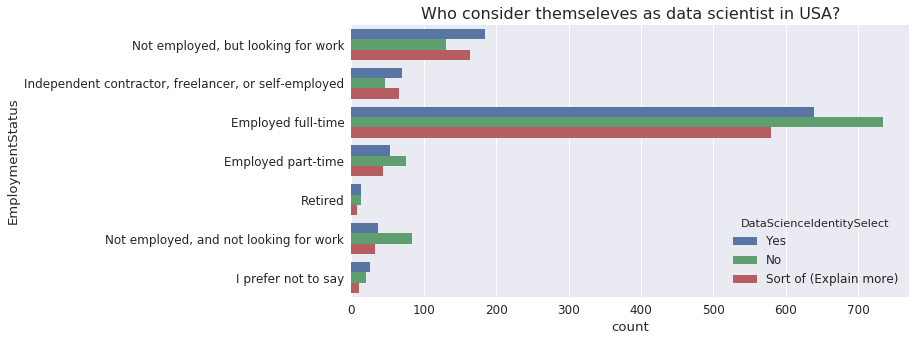

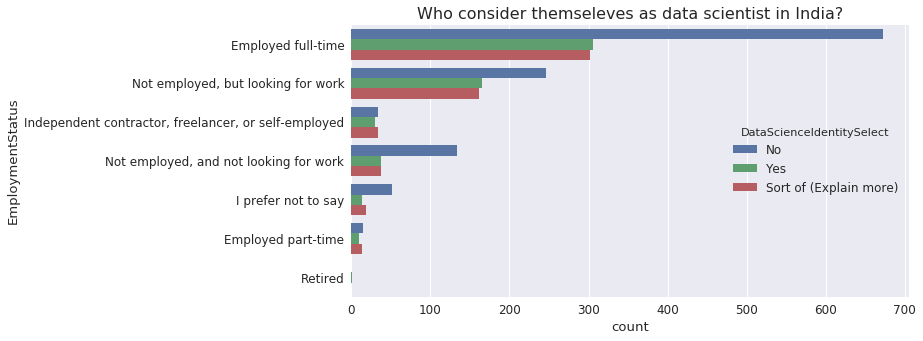

In [28]:
ds_country = multiChoice[['Country','EmploymentStatus','DataScienceIdentitySelect']].dropna()

# Groupby country and get India and US
ds_country_US = ds_country.groupby('Country').get_group('United States').reset_index(drop=True)
ds_country_India = ds_country.groupby('Country').get_group('India').reset_index(drop=True)

plt.figure(figsize=(10,5))
sns.countplot(y=ds_country_US['EmploymentStatus'], data=ds_country_US, hue='DataScienceIdentitySelect')
plt.title("Who consider themseleves as data scientist in USA?", fontsize=16)
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y=ds_country_India['EmploymentStatus'], data=ds_country_India, hue='DataScienceIdentitySelect')
plt.title("Who consider themseleves as data scientist in India?", fontsize=16)
plt.show()

Did you notice that? Yes, the number of **Yes** and **Sort of** is almost always equal in any case in India. As I said, every other kid is calling himself/herself a data scientist now a days. Reminds me of the days when web development was at hype, and everyone became a web developer all of a sudden. This is the one of the main reasons why data scientists re exploited and not paid well in India. and this situation is getting worse everyday.

Anyways, let's move to the background check now.

# Background-Check

### Highest level of Education

Master's degree                                                       : 6273 --> approx. 41.78%
Bachelor's degree                                                     : 4811 --> approx. 32.04%
Doctoral degree                                                       : 2347 --> approx. 15.63%
Some college/university study without earning a bachelor's degree     : 786 --> approx. 5.23%
Professional degree                                                   : 451 --> approx. 3.00%
I did not complete any formal education past high school              : 257 --> approx. 1.71%
I prefer not to answer                                                : 90 --> approx. 0.60%


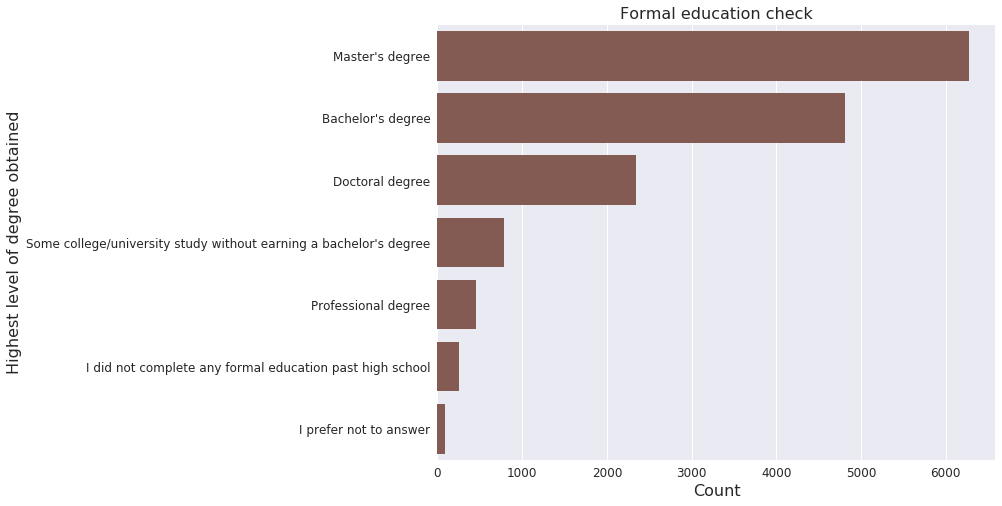

In [29]:
# Q. Which level of formal education have you attained?

edu = multiChoice['FormalEducation'].dropna()
edu_count = edu.value_counts()

for i in range(len(edu_count)):
    choice = edu_count.index[i]
    count = edu_count.values[i]
    percent = (count/len(edu))*100
    print("{:<70s}: {} --> approx. {:.2f}%".format(choice, count, percent))
    

f = plt.figure(figsize=(10,8))
sns.barplot(y=edu_count.index, x=edu_count.values, orient='h', color=color[5])
plt.title("Formal education check", fontsize=16)
plt.ylabel("Highest level of degree obtained", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show()    

I don't think there is anything abnormal here. But I doubt, that in the near future, the ratio of people having Masters or Bachelors doing data science will change drastically, more positively in case of Bachelors.

### Major during graduation

Computer Science                                            : 4397 --> approx. 33.11%
Mathematics or statistics                                   : 2220 --> approx. 16.72%
Engineering (non-computer focused)                          : 1339 --> approx. 10.08%
Electrical Engineering                                      : 1303 --> approx. 9.81%
Other                                                       : 848 --> approx. 6.39%
Physics                                                     : 830 --> approx. 6.25%
Information technology, networking, or system administration: 693 --> approx. 5.22%
A social science                                            : 531 --> approx. 4.00%
Biology                                                     : 274 --> approx. 2.06%
Management information systems                              : 237 --> approx. 1.78%
A humanities discipline                                     : 198 --> approx. 1.49%
A health science                                            : 152 -->

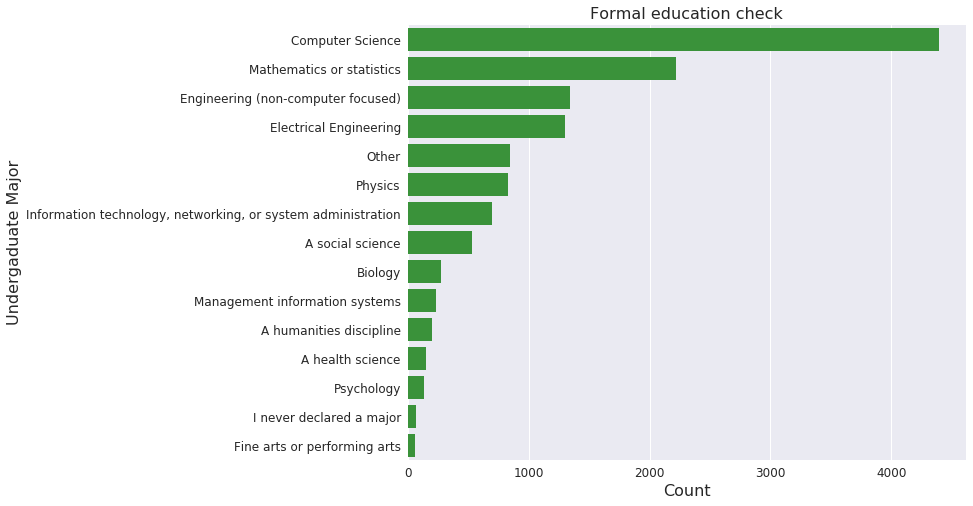

In [30]:
# Q. Which best describes your undergraduate major?
major = multiChoice['MajorSelect'].dropna()
major_count = major.value_counts()

for i in range(len(major_count)):
    choice = major_count.index[i]
    count = major_count.values[i]
    percent = (count/len(major))*100
    print("{:<60s}: {} --> approx. {:.2f}%".format(choice, count, percent))
    

f = plt.figure(figsize=(10,8))
sns.barplot(y=major_count.index, x=major_count.values, orient='h', color=color[2])
plt.title("Formal education check", fontsize=16)
plt.ylabel("Undergaduate Major", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show() 

# What people do at work?

### Algorithm

It will be interesting to see what kind of algorithms people use in their day to day work and what's the ratio. Let's dive in. 

In [31]:
# Geth the corresponding column and drop the null values
algo = multiChoice['WorkAlgorithmsSelect'].dropna()

# This was a multiplr choice question. So, let's have a look how at the data first
algo.head()

0                  Neural Networks,Random Forests,RNNs
3    Bayesian Techniques,Decision Trees,Random Fore...
4    Bayesian Techniques,CNNs,Ensemble Methods,Neur...
5    Bayesian Techniques,CNNs,Decision Trees,Gradie...
9    CNNs,Decision Trees,Gradient Boosted Machines,...
Name: WorkAlgorithmsSelect, dtype: object

In [32]:
# A handy-dandy function to process the values for multiple choice questions
def split_values(x, samples_dict):
    # Split values based on comma, just don't split the values with comma inside a parentheses
    items = re.split(r',(?!(?:[^(]*\([^)]*\))*[^()]*\))', x)
    for item in items:
        samples_dict[item] +=1

In [33]:
'''
This is how are going to process this.
1) Initialize an empty dictionary to keep count of each of the algorithm
2) Split the string in each row at ',' and update the items in the dict accordingly
3) Find the count and percentage for each algorithm
'''

# Create a new dictionary
samples_dict = defaultdict(int)


# Apply the fucntion to each row of the series
algo = algo.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

# Check the percentage of each algorithm used
for item in samples_dict.keys():
    val = samples_dict[item]
    percent = (val/len(algo))*100
    print("{:<30s} -->   {} ----->   approx.   {:.2f}%".format(item, val, percent))

Regression/Logistic Regression -->   4636 ----->   approx.   63.50%
Decision Trees                 -->   3640 ----->   approx.   49.86%
Random Forests                 -->   3378 ----->   approx.   46.27%
Neural Networks                -->   2743 ----->   approx.   37.57%
Bayesian Techniques            -->   2236 ----->   approx.   30.63%
Ensemble Methods               -->   2078 ----->   approx.   28.46%
SVMs                           -->   1948 ----->   approx.   26.68%
Gradient Boosted Machines      -->   1742 ----->   approx.   23.86%
CNNs                           -->   1383 ----->   approx.   18.94%
RNNs                           -->   895 ----->   approx.   12.26%
Other                          -->   609 ----->   approx.   8.34%
Evolutionary Approaches        -->   404 ----->   approx.   5.53%
HMMs                           -->   392 ----->   approx.   5.37%
Markov Logic Networks          -->   355 ----->   approx.   4.86%
GANs                           -->   207 ----->   approx.

So, more than 60% of the people use LR at work. This doesn't surprise me. Most of the time you would be hearning from top authorities in your firm `Why don't use LR and get done with it?` or `Don't you know LR?`. GANs are used by only a very small fraction and that makes sense too because not a lot of people know about it or how to use it.Also, GANs haven't find their way yet into the daily applications

### Algorithms applied on what kind of work?

In [34]:
# Selct the corresponding column and drop any null values
work = multiChoice['WorkDataTypeSelect'].dropna()
work.head()

0     Text data,Relational data
3               Relational data
4    Image data,Relational data
5     Text data,Relational data
8               Relational data
Name: WorkDataTypeSelect, dtype: object

In [35]:
# Create a new dictionary
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
work = work.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

# Check the percentage of each algorithm used
for item in samples_dict.keys():
    val = samples_dict[item]
    percent = (val/len(work))*100
    print("{:<30s} -->   {} ----->   approx.   {:.2f}%".format(item, val, percent))

Relational data                -->   5256 ----->   approx.   65.50%
Text data                      -->   4255 ----->   approx.   53.03%
Image data                     -->   1456 ----->   approx.   18.15%
Other                          -->   823 ----->   approx.   10.26%
Video data                     -->   409 ----->   approx.   5.10%


The only thing that is weird is that **Image** data is used only by 18%. Come on!!

### Hardware

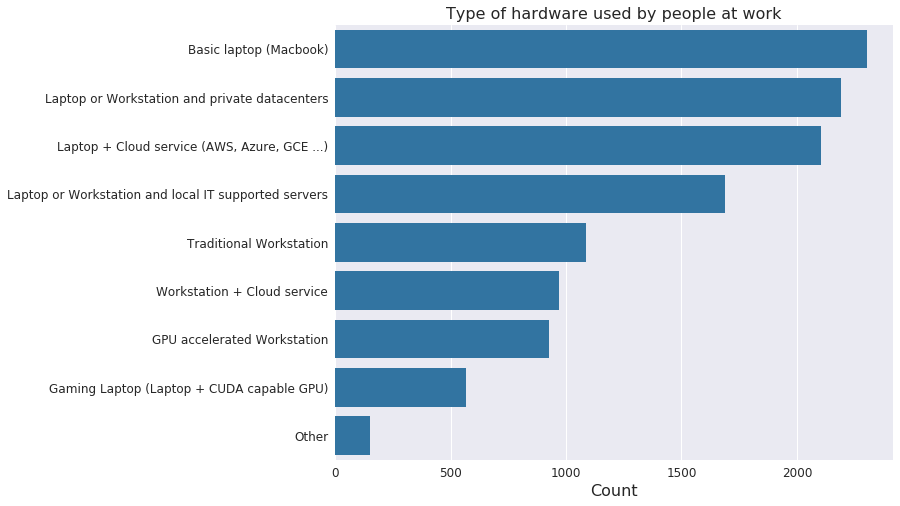

In [36]:
hardware = multiChoice['WorkHardwareSelect'].dropna()

# Create a new dictionary
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
hardware = hardware.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,8))
sns.barplot(x=list(samples_dict.values()), y=list(samples_dict.keys()), orient='h', color=color[0])
plt.title("Type of hardware used by people at work", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show()

### Tools 

In [37]:
tools = multiChoice['WorkToolsSelect'].dropna()

# Initialize an empy dict
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
tools = tools.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

# Check the percentage of each algorithm used
for item in samples_dict.keys():
    val = samples_dict[item]
    percent = (val/len(tools))*100
    print("{:<50s} -->   {} ----->   approx.   {:.2f}%".format(item, val, percent))

Python                                             -->   6073 ----->   approx.   76.34%
R                                                  -->   4708 ----->   approx.   59.18%
SQL                                                -->   4261 ----->   approx.   53.56%
Jupyter notebooks                                  -->   3206 ----->   approx.   40.30%
TensorFlow                                         -->   2256 ----->   approx.   28.36%
Amazon Web services                                -->   1868 ----->   approx.   23.48%
Unix shell / awk                                   -->   1854 ----->   approx.   23.31%
Tableau                                            -->   1619 ----->   approx.   20.35%
C/C++                                              -->   1528 ----->   approx.   19.21%
NoSQL                                              -->   1527 ----->   approx.   19.20%
MATLAB/Octave                                      -->   1461 ----->   approx.   18.37%
Java                            

**Python...Python....Python!!** More than 75% people use Python at their work. FYI, as per StackoverFlow survey Python has overtaken R in 2017. In fact it is one of the fastest growing languages. All credits goes to **Pandas**, **Jupyter**, **TensorFlow**, **Keras**, etc.

If you look closely, you will find that **Jupyter** is used by 40% and **TensorFlow** by almost 30%. Both are awesome. I use notebooks heavily. Can't imagine a life without them.

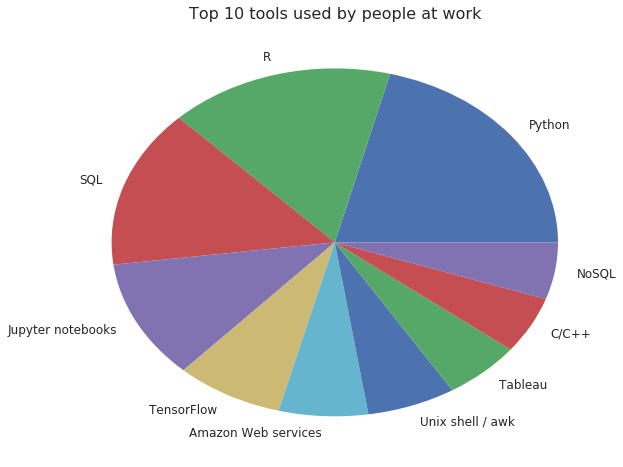

In [38]:
# Let's plot the top 10 tools used 
tool = list(samples_dict.keys())[:10]
count = list(samples_dict.values())[:10]


plt.figure(figsize=(10,8))
plt.pie(count, labels=tool)
plt.title("Top 10 tools used by people at work", fontsize=16)
plt.show()

### Production first!

I have always wondered how many people actually worry about doing production-ready things (I take this very seriously).

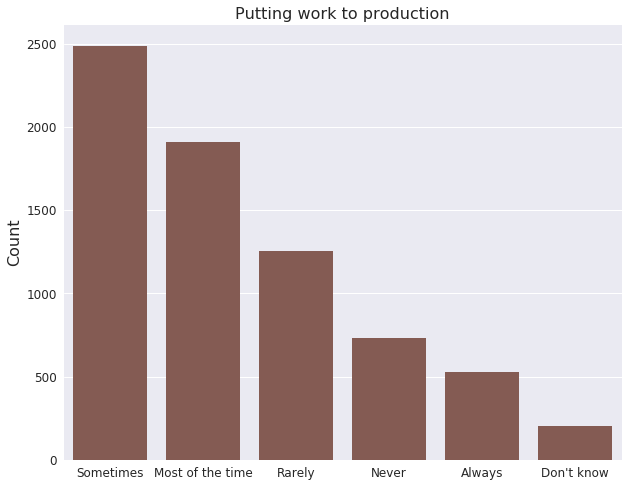

In [39]:
production = multiChoice['WorkProductionFrequency'].dropna()
production_count = production.value_counts()

plt.figure(figsize=(10,8))
sns.barplot(x=production_count.index, y=production_count.values, color=color[5])
plt.title("Putting work to production", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### Size of the dataset

I have seen a lot of people throwing away the term **Big Data** at everyone's face. Let's check how many people actually work with how much amount of data.

In [40]:
dataset = multiChoice['WorkDatasetSize'].dropna()
dataset_count = dataset.value_counts()

for i in range(len(dataset_count)):
    choice = dataset_count.index[i]
    count = dataset_count.values[i]
    percent = (count/len(dataset))*100
    print("{:<10s}: {} --> approx. {:.2f}%".format(choice, count, percent))

1GB       : 1737 --> approx. 24.51%
10GB      : 1428 --> approx. 20.15%
100MB     : 1355 --> approx. 19.12%
100GB     : 803 --> approx. 11.33%
10MB      : 688 --> approx. 9.71%
1TB       : 405 --> approx. 5.71%
<1MB      : 196 --> approx. 2.77%
1MB       : 192 --> approx. 2.71%
10TB      : 170 --> approx. 2.40%
100TB     : 67 --> approx. 0.95%
1PB       : 22 --> approx. 0.31%
10PB      : 12 --> approx. 0.17%
100PB     : 5 --> approx. 0.07%
>1EB      : 4 --> approx. 0.06%
1EB       : 4 --> approx. 0.06%


25% of the people work mainly on 1GB of data at max. **Big Data** ..LOL

### How much time does each sub-tasks take?

Building model is not a single process. It includes data cleansing, preprocessing, finding insights, model selection and building, etc. Each of these task takes certain percentage of the toatl time taken from initial to final step. 

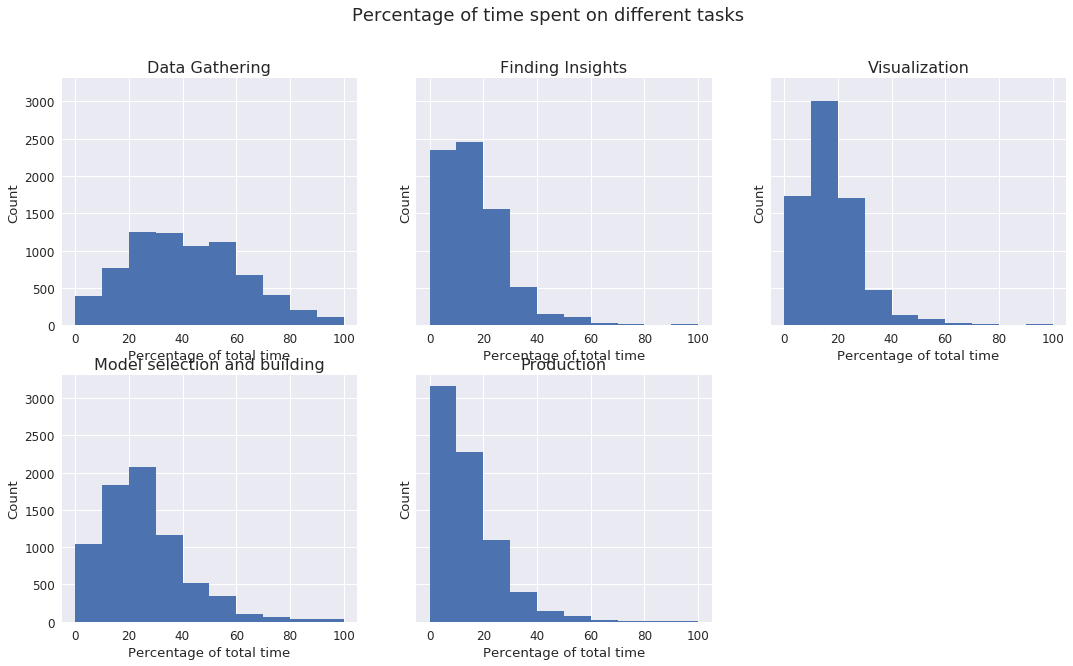

In [41]:
# Get all the relevant columns
df = multiChoice[['TimeGatheringData', 'TimeFindingInsights', 'TimeVisualizing','TimeModelBuilding', 'TimeProduction']]

# Drop the null values
df = df.dropna().reset_index(drop=True)

# Take the sum and remove all those rows where sum is greater than 100
df['total_time'] = df.sum(axis=1)
df = df.drop(df.index[((df.total_time > 100.0) | (df.total_time==0.0))], axis=0).reset_index(drop=True)
df = df.drop(df['total_time'], axis=0)


category = ['TimeGatheringData', 'TimeFindingInsights', 'TimeVisualizing','TimeModelBuilding', 'TimeProduction']
names =['Data Gathering', 'Finding Insights', 'Visualization', 'Model selection and building', 'Production']

f,axs = plt.subplots(2,3, figsize=(18,10), sharey=True)
for i, catg in enumerate(category):
    axs[i//3, i%3].hist(df[catg],bins=10,normed=0)
    axs[i//3, i%3].set_title(names[i], fontsize=16)
    axs[i//3, i%3].set_xlabel('Percentage of total time')
    axs[i//3, i%3].set_ylabel('Count')

f.delaxes(axs[1][2])
f.suptitle("Percentage of time spent on different tasks", fontsize=18)
plt.show()

No doubt that gathering data is the most time consuming process. Many times you are able to get data, but then you find out that most of the data is so bad that you need to collect more before starting working on it 

### Internal or External resources?

In [42]:
resources = multiChoice['WorkInternalVsExternalTools'].dropna()
resoucres_count = resources.value_counts()

for i in range(len(resoucres_count)):
    choice = resoucres_count.index[i]
    count = resoucres_count.values[i]
    percent = (count/len(resources))*100
    print("{:<50s}: {}  -->   approx.  {:.2f}%".format(choice, count, percent))

More internal than external                       : 2448  -->   approx.  36.23%
Entirely internal                                 : 1934  -->   approx.  28.62%
Approximately half internal and half external     : 927  -->   approx.  13.72%
More external than internal                       : 673  -->   approx.  9.96%
Do not know                                       : 577  -->   approx.  8.54%
Entirely external                                 : 198  -->   approx.  2.93%


I don't know why I feel bad about this. IMO, people should be free to use any tool they like until unless it's something that violates some policy or it doesn't help in the long run.

Also, I don't understand these people who have answered **Do not know**. If you don't know the tools you are working on, what in the world are you doing in the company?

### Storage

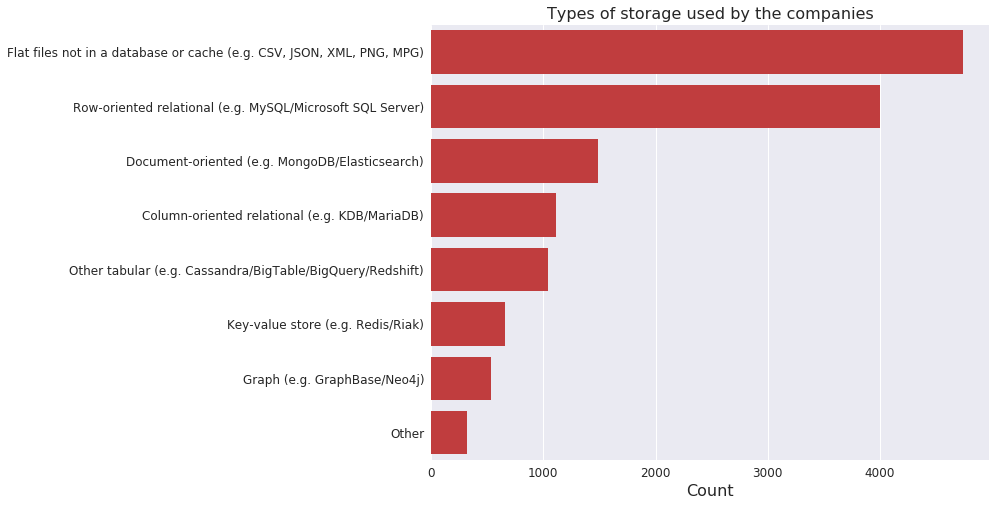

In [43]:
# Q. At work, which of these data storage models do you typically use? 
storage = multiChoice['WorkDataStorage'].dropna()

# This is a multiplt choice question. So, we will use our handy-dandy function we defined earlier
# Create a new dictionary
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
storage = storage.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,8))
sns.barplot(x=list(samples_dict.values()), y=list(samples_dict.keys()), color=color[3])
plt.title("Types of storage used by the companies", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show()

### Code sharing

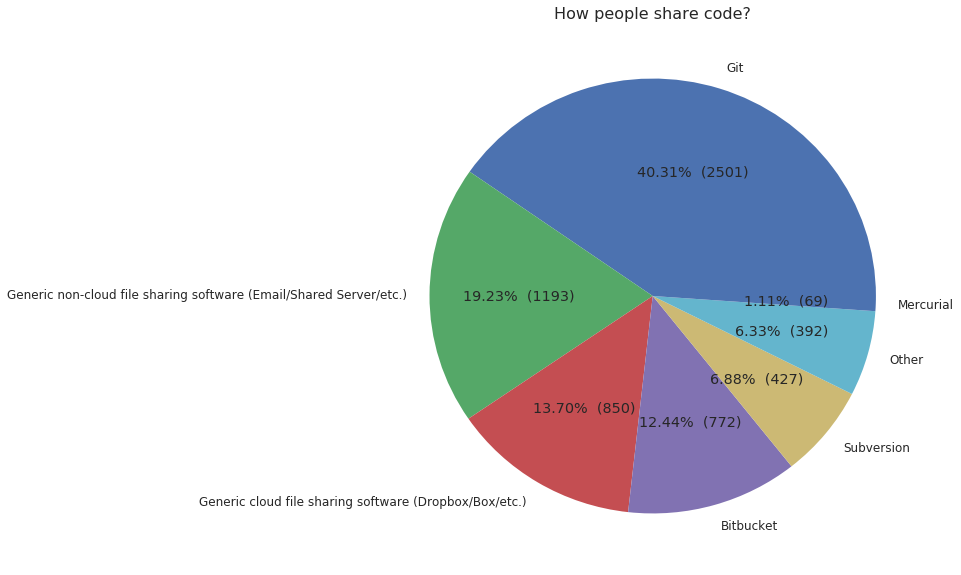

In [44]:
# Q. At work, which tools do you use to share code?
code_share = multiChoice['WorkCodeSharing'].dropna()

# Create a new dictionary
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
code_share = code_share.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

tool = list(samples_dict.keys())
count = list(samples_dict.values())

# Fancy way of showing percentage in pie chart
#Courtesy: StackOverflow
def show_autopct(values):
    def my_autopct(pct):
        total = len(code_share)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.figure(figsize=(10,10))
patches, text, autotext = plt.pie(count, labels=tool, autopct=show_autopct(count))
plt.title("How people share code?", fontsize=16)
plt.show()    

No doubt **Git** would have been the first choice. I am surprise by the low percentage of **Bit Bucket** though. I know a lot of companies are using it. Strange.

### Challenges or Barriers?

In [45]:
# Q. At work, which barriers or challenges have you faced this past year?
barriers = multiChoice['WorkChallengesSelect'].dropna()

# Create a new dictionary
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
barriers = barriers.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

# Check the percentage of each algorithm used
for item in samples_dict.keys():
    val = samples_dict[item]
    percent = (val/len(barriers))*100
    print("{:<70s} ->   {}  {:.2f}%".format(item, val, percent))

Dirty data                                                             ->   3641  49.36%
Lack of data science talent in the organization                        ->   3067  41.58%
Company politics / Lack of management/financial support for a data science team ->   2746  37.23%
The lack of a clear question to be answering or a clear direction to go in with the available data ->   2242  30.40%
Unavailability of/difficult access to data                             ->   2230  30.23%
Data Science results not used by business decision makers              ->   1796  24.35%
Explaining data science to others                                      ->   1622  21.99%
Privacy issues                                                         ->   1460  19.79%
Lack of significant domain expert input                                ->   1444  19.58%
Organization is small and cannot afford a data science team            ->   1316  17.84%
Team using multiple ad-hoc development environments such as Python/R/Java

**Dirty data** or **unavailability of data** is certainly a big challenge. I am surprised by the thing about 42% people states that there is a lack of talent in the DS team in the organization. This is actually bad. **Company politics** has always been a barrier in the corporate world. TBH, I don't get it. Why people focus on gossips and all rather than doing work as a team? Why is it so hard for people to understand that everyone at the company is for some good reason?

### Annual Salary

This one is going to be very interesting. We will first get an overview how people are paid and thereafter we will correlate the differences between the salary people are getting in some top countries

In [46]:
# Select the column for compensation amount along with the currency column
salary = multiChoice[['CompensationAmount', 'CompensationCurrency']].dropna().reset_index(drop=True)

# Let's take a look 
salary.head()

,CompensationAmount,CompensationCurrency
0,"250,000",USD
1,80000,AUD
2,1200000,RUB
3,"95,000",INR
4,1100000,TWD


In [47]:
# We are given a currency conversion rate CSV which we read in the begining. Let's have a look at it first
cvRates.head()

,Unnamed: 0,originCountry,exchangeRate
0,1,USD,1.000000
1,2,EUR,1.195826
2,3,INR,0.015620
3,4,GBP,1.324188
4,5,BRL,0.321350


In [48]:
# Drop the extra column from the rates files
cvRates.drop(['Unnamed: 0'], axis=1, inplace=True)

# Convert the exchangeRate column to numeric
cvRates['exchangeRate'] = pd.to_numeric(cvRates['exchangeRate']).astype(np.float)

# Let's join this table with our salary table
salary_rate = pd.merge(left=salary ,right=cvRates, how='left', left_on='CompensationCurrency', right_on='originCountry')

# Check if everything is in the way we want it to be
salary_rate.head()

,CompensationAmount,CompensationCurrency,originCountry,exchangeRate
0,"250,000",USD,USD,1.000000
1,80000,AUD,AUD,0.802310
2,1200000,RUB,RUB,0.017402
3,"95,000",INR,INR,0.015620
4,1100000,TWD,TWD,0.033304


In [49]:
"""
We are going to process the salary as following:
1) Convert the CompensationAmount column values to numeric
2) Multiply the compensation with the exchange rate to find the salary in USD 
3) Find the top annual salaries
4) Compare salaries difference for some of the countries
"""

# A handy-dandy function to convert string values to integers
def convert_values(x):
    try:
        x = int("".join(x.split(','))) 
    except:
        x = 0
    return x   

# Convert the string values to numbers
salary_rate['CompensationAmount'] = salary_rate['CompensationAmount'].apply(convert_values)

# Drop the rows where CompensationAnmount is 0
salary_rate = salary_rate.drop(salary_rate.index[salary_rate['CompensationAmount']==0])

# Multiply the exchange rate with the compensation to get salary amount in USD
salary_rate['SalaryUSD'] = salary_rate['CompensationAmount'] * salary_rate['exchangeRate']

salary_rate.head()

,CompensationAmount,CompensationCurrency,originCountry,exchangeRate,SalaryUSD
0,250000,USD,USD,1.000000,250000.0
1,80000,AUD,AUD,0.802310,64184.8
2,1200000,RUB,RUB,0.017402,20882.4
3,95000,INR,INR,0.015620,1483.9
4,1100000,TWD,TWD,0.033304,36634.4


Median salary is :  53993.4


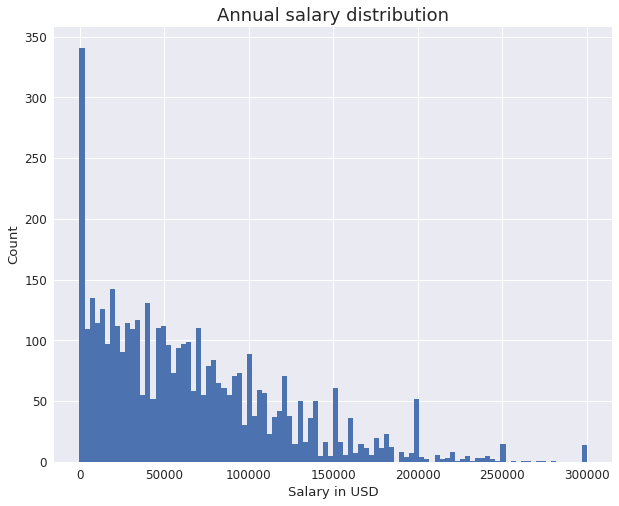

In [50]:
# Check the median salary
median_sal = salary_rate.SalaryUSD.median()
print("Median salary is : ", median_sal)

# For plotting purpose, remove all values above the 300,000. The count of such values will be low.
salary_rate = salary_rate.drop(salary_rate.index[salary_rate['SalaryUSD'] > 300000 ], axis=0).reset_index(drop=True)

# Drop null values
salary_rate = salary_rate.dropna()

# Plot the distribution of the annula salaries
plt.figure(figsize=(10,8))
plt.hist(salary_rate['SalaryUSD'], bins=100, normed=0)
plt.title("Annual salary distribution", fontsize=18)
plt.xlabel("Salary in USD")
plt.ylabel("Count")
plt.show()

So, most of the people working in data science field are earning 10,000-100,000 USD annualy. 

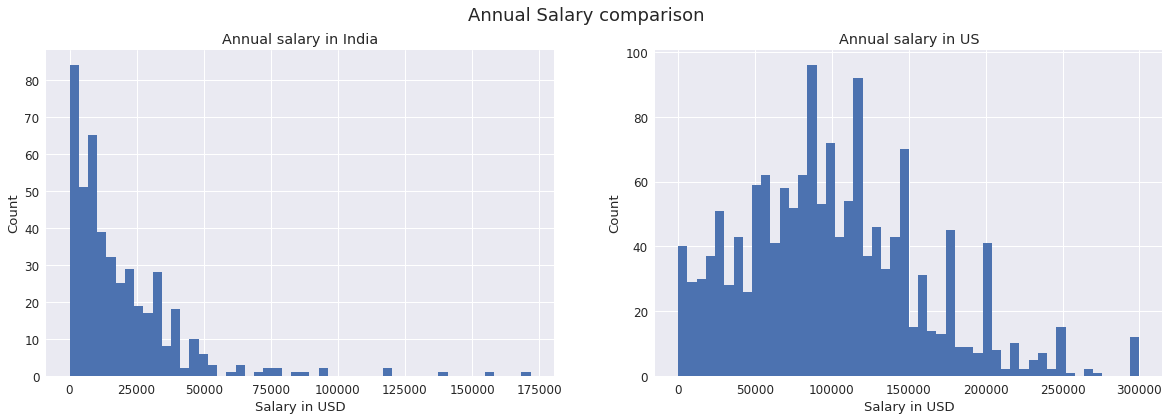

In [51]:
# How the salary compares in India and US?
salary_IN = salary_rate.groupby('originCountry').get_group('INR')
salary_US = salary_rate.groupby('originCountry').get_group('USD')

# Plot the results
f, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].hist(salary_IN['SalaryUSD'], bins=50, normed=0)
ax[0].set_title('Annual salary in India')
ax[0].set_xlabel('Salary in USD')
ax[0].set_ylabel('Count')

ax[1].hist(salary_US['SalaryUSD'], bins=50, normed=0)
ax[1].set_title('Annual salary in US')
ax[1].set_xlabel('Salary in USD')
ax[1].set_ylabel('Count')

f.suptitle('Annual Salary comparison', fontsize=18)
plt.show()

Did you see that? Yes, most of the people in India earns below 25,000USD/year whereas in US most of the people earn above 100,000USD/year. I know that US is more expensive in terms of living and all but still, people in India are underpaid and one of the biggest factor contributing to this fact is the **Yes/Sort of** situation we discussed above

Anyways, let's move on to some other aspects.

### Job Satisfaction

7                             : 1448 -->  approx. 21.69%
8                             : 1427 -->  approx. 21.37%
6                             : 765 -->  approx. 11.46%
9                             : 677 -->  approx. 10.14%
5                             : 627 -->  approx. 9.39%
10 - Highly Satisfied         : 589 -->  approx. 8.82%
3                             : 358 -->  approx. 5.36%
4                             : 354 -->  approx. 5.30%
1 - Highly Dissatisfied       : 167 -->  approx. 2.50%
I prefer not to share         : 148 -->  approx. 2.22%
2                             : 117 -->  approx. 1.75%


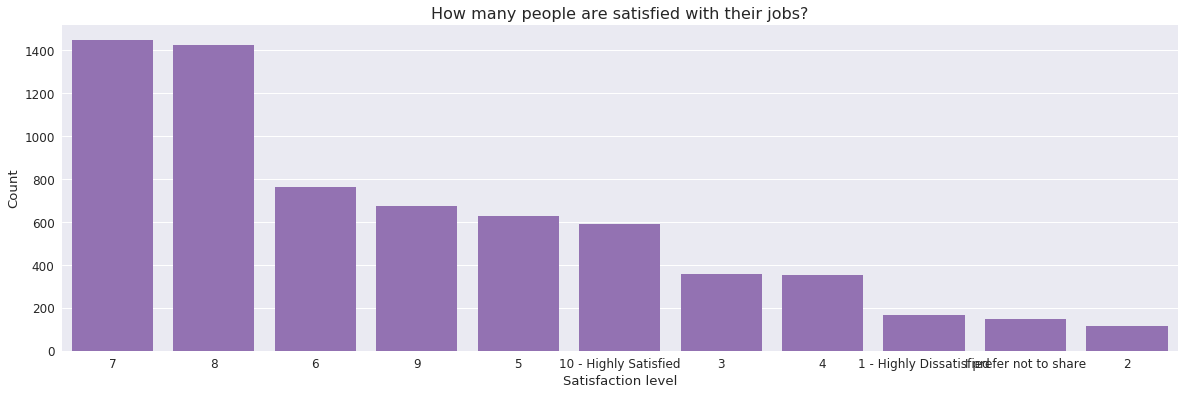

In [52]:
# Q. On a scale from 0 (Highly Dissatisfied) - 10 (Highly Satisfied), how satisfied are you with your current job?
job_satisfaction = multiChoice['JobSatisfaction'].dropna()
job_satis_count = job_satisfaction.value_counts()

for i in range(len(job_satis_count)):
    choice = job_satis_count.index[i]
    count = job_satis_count.values[i]
    percent = (count/len(job_satisfaction))*100
    print("{:<30s}: {} -->  approx. {:.2f}%".format(choice, count, percent))
    

plt.figure(figsize=(20,6))
sns.barplot(y=job_satis_count.values, x=job_satis_count.index, orient='v', color=color[4])
plt.title("How many people are satisfied with their jobs?", fontsize=16)
plt.xlabel("Satisfaction level")
plt.ylabel("Count")
plt.show()

More than 50% of the people provided a value between 5 and 10. And it's good. Playing with data is always fun until unless you are paid very low for your job or there is some internal dirty politics within the office

## Plans for future, recommendations, and so on....

### Tools for Next year

In [53]:
# Q. Which tool or technology are you most excited about learning in the next year?
future_tool = multiChoice['MLToolNextYearSelect'].dropna()
future_tool_count = future_tool.value_counts()

for i in range(len(future_tool_count)):
    choice = future_tool_count.index[i]
    count = future_tool_count.values[i]
    percent = (count/len(future_tool))*100
    print("{:<50s}: {} --> approx. {:.2f}%".format(choice, count, percent))

TensorFlow                                        : 2621 --> approx. 23.83%
Python                                            : 1713 --> approx. 15.58%
R                                                 : 910 --> approx. 8.27%
Spark / MLlib                                     : 755 --> approx. 6.86%
Hadoop/Hive/Pig                                   : 417 --> approx. 3.79%
Other                                             : 407 --> approx. 3.70%
Amazon Machine Learning                           : 392 --> approx. 3.56%
Jupyter notebooks                                 : 358 --> approx. 3.26%
I don't plan on learning a new tool/technology    : 341 --> approx. 3.10%
Google Cloud Compute                              : 296 --> approx. 2.69%
Amazon Web services                               : 273 --> approx. 2.48%
Julia                                             : 222 --> approx. 2.02%
DataRobot                                         : 220 --> approx. 2.00%
Microsoft Azure Machine Learning  

Ha!! 25% of the people want to learn **TensorFlow** and **Python** next year. And then there are people who publishe article with the title: "TensorFlow sucks". They should actually rename it to "TensorFlow sucks for me".

### Language recommendation by experts to new/aspiring data scientists

Python                        : 6941 --> approx. 63.11%
R                             : 2643 --> approx. 24.03%
SQL                           : 385 --> approx. 3.50%
C/C++/C#                      : 307 --> approx. 2.79%
Matlab                        : 238 --> approx. 2.16%
Java                          : 138 --> approx. 1.25%
Scala                         : 94 --> approx. 0.85%
SAS                           : 88 --> approx. 0.80%
Other                         : 85 --> approx. 0.77%
Julia                         : 30 --> approx. 0.27%
Stata                         : 28 --> approx. 0.25%
Haskell                       : 17 --> approx. 0.15%
F#                            : 4 --> approx. 0.04%


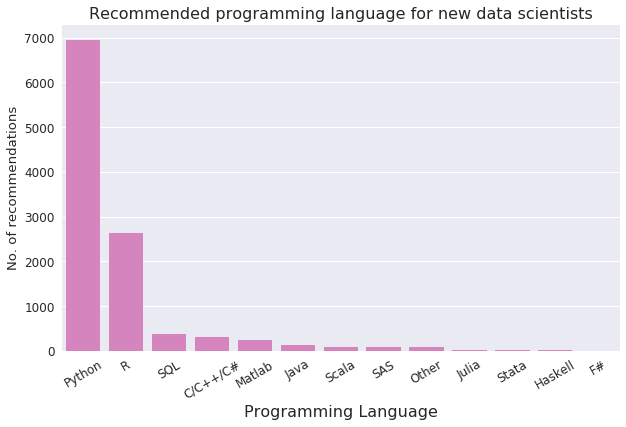

In [54]:
# Q. What programming language would you recommend a new data scientist learn first?
recommended_lang = multiChoice['LanguageRecommendationSelect'].dropna()
lang_count = recommended_lang.value_counts()

for i in range(len(lang_count)):
    choice = lang_count.index[i]
    count = lang_count.values[i]
    percent = (count/len(recommended_lang))*100
    print("{:<30s}: {} --> approx. {:.2f}%".format(choice, count, percent))
    
plt.figure(figsize=(10,6))
sns.barplot(x=lang_count.index, y=lang_count.values, color=color[6])
plt.title("Recommended programming language for new data scientists", fontsize=16)
plt.xlabel("Programming Language", fontsize=16)
plt.xticks(rotation=30)
plt.ylabel("No. of recommendations")
plt.show()

Let me say it loud this time: **Welcome to the world of Python!!**

### ML Methods people want to learn...

In [55]:
# Q.Which ML/DS method are you most excited about learning in the next year?
mlMethods = multiChoice['MLMethodNextYearSelect'].dropna()
mlMethods_count = mlMethods.value_counts()

for i in range(len(mlMethods_count)):
    choice = mlMethods_count.index[i]
    count = mlMethods_count.values[i]
    percent = (count/len(mlMethods))*100
    print("{:<50s}: {} --> approx. {:.2f}%".format(choice, count, percent))

Deep learning                                     : 4362 --> approx. 40.27%
Neural Nets                                       : 1386 --> approx. 12.79%
Time Series Analysis                              : 680 --> approx. 6.28%
Bayesian Methods                                  : 511 --> approx. 4.72%
Text Mining                                       : 493 --> approx. 4.55%
Genetic & Evolutionary Algorithms                 : 425 --> approx. 3.92%
Social Network Analysis                           : 364 --> approx. 3.36%
Anomaly Detection                                 : 307 --> approx. 2.83%
Ensemble Methods (e.g. boosting, bagging)         : 269 --> approx. 2.48%
Other                                             : 258 --> approx. 2.38%
Monte Carlo Methods                               : 230 --> approx. 2.12%
Regression                                        : 220 --> approx. 2.03%
Cluster Analysis                                  : 216 --> approx. 1.99%
I don't plan on learning a new ML/

Well, this isn't surprising. Given the progress, we have made using DL, it's the most obvious choice to learn. Combining Neural Nets and Deep Learning, more than 50% people want to learn these skills

### Learning platforms and resources

Kaggle                        :   6645 ----->   approx.   58.96%
Online courses                :   6042 ----->   approx.   53.61%
Stack Overflow Q&A            :   5703 ----->   approx.   50.60%
YouTube Videos                :   5291 ----->   approx.   46.94%
Personal Projects             :   4873 ----->   approx.   43.23%
Blogs                         :   4828 ----->   approx.   42.84%
Textbook                      :   4246 ----->   approx.   37.67%
College/University            :   3397 ----->   approx.   30.14%
Arxiv                         :   2418 ----->   approx.   21.45%
Official documentation        :   2354 ----->   approx.   20.89%
Conferences                   :   2217 ----->   approx.   19.67%
Friends network               :   1617 ----->   approx.   14.35%
Tutoring/mentoring            :   1458 ----->   approx.   12.94%
Podcasts                      :   1238 ----->   approx.   10.98%
Non-Kaggle online communities :   1169 ----->   approx.   10.37%
Newsletters              

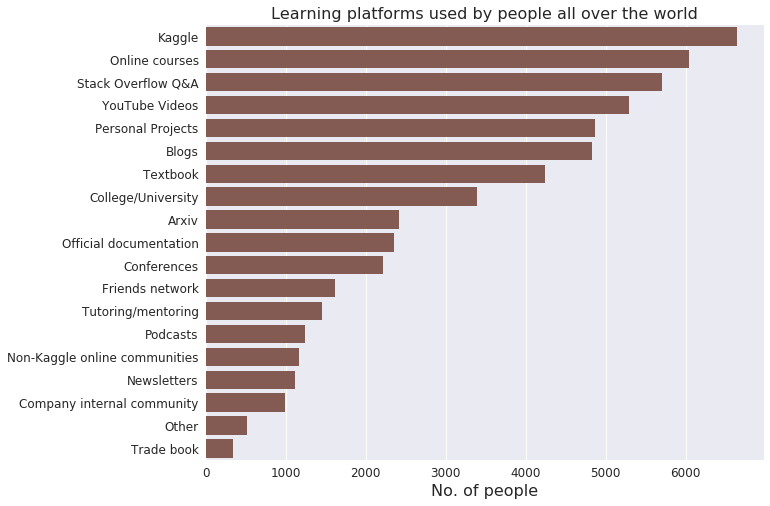

In [56]:
# Q.What platforms & resources have you used to continue learning data science skills?
resources = multiChoice['LearningPlatformSelect'].dropna()

# This is a multiplt choice question. So, we will use our handy-dandy function we defined earlier
# Create a new dictionary
samples_dict = defaultdict(int)

# Apply the fucntion to each row of the series
resources = resources.apply(split_values, args=(samples_dict,))

# Sort the dictionay based on its values
samples_dict = dict(sorted(samples_dict.items(), key=lambda x: x[1], reverse=True))

# Check the percentage of each algorithm used
for item in samples_dict.keys():
    val = samples_dict[item]
    percent = (val/len(resources))*100
    print("{:<30s}:   {} ----->   approx.   {:.2f}%".format(item, val, percent))

plt.figure(figsize=(10,8))
sns.barplot(x=list(samples_dict.values()), y=list(samples_dict.keys()), orient='h', color=color[5])
plt.title("Learning platforms used by people all over the world", fontsize=16)
plt.xlabel("No. of people", fontsize=16)
plt.show()

**Kaggle** is the most obvious choice. Even for me, I think Kaggle contributes to my learning more than anything else.
One good thing about these stats is that this actually represents the true learning platforms. People start with Kaggle, do some online courses for getting a background on the subject, then SO is the one when it comes to doubts and questions related to anything. Except for that, I would advise people to read more papers from **arxiv** as well as go through documentation too. For example, in case of **TensorFlow**, documentation is the real resource to learn it.

### How long have you been learning data science?

< 1 year            : 2093 --> approx. 48.13%
1-2 years           : 1566 --> approx. 36.01%
3-5 years           : 540 --> approx. 12.42%
5-10 years          : 106 --> approx. 2.44%
15+ years           : 30 --> approx. 0.69%
10-15 years         : 14 --> approx. 0.32%


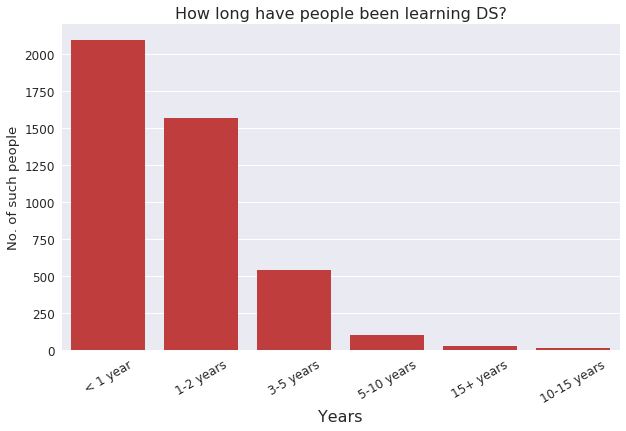

In [57]:
learning = multiChoice['LearningDataScienceTime'].dropna()
learning_count = learning.value_counts()

for i in range(len(learning_count)):
    choice = learning_count.index[i]
    count = learning_count.values[i]
    percent = (count/len(learning))*100
    print("{:<20s}: {} --> approx. {:.2f}%".format(choice, count, percent))
    
plt.figure(figsize=(10,6))
sns.barplot(x=learning_count.index, y=learning_count.values, color=color[3])
plt.title("How long have people been learning DS?", fontsize=16)
plt.xlabel("Years", fontsize=16)
plt.xticks(rotation=30)
plt.ylabel("No. of such people")
plt.show()

More than 80% people started learning DS for less than 2 years. If I remember correctly, it was 2014 onwards, when the hype for ML and DL actually went up. So, it makes sense that large number of people have just started learning this because of that hype

### Importance of skills for getting job in the field of DS

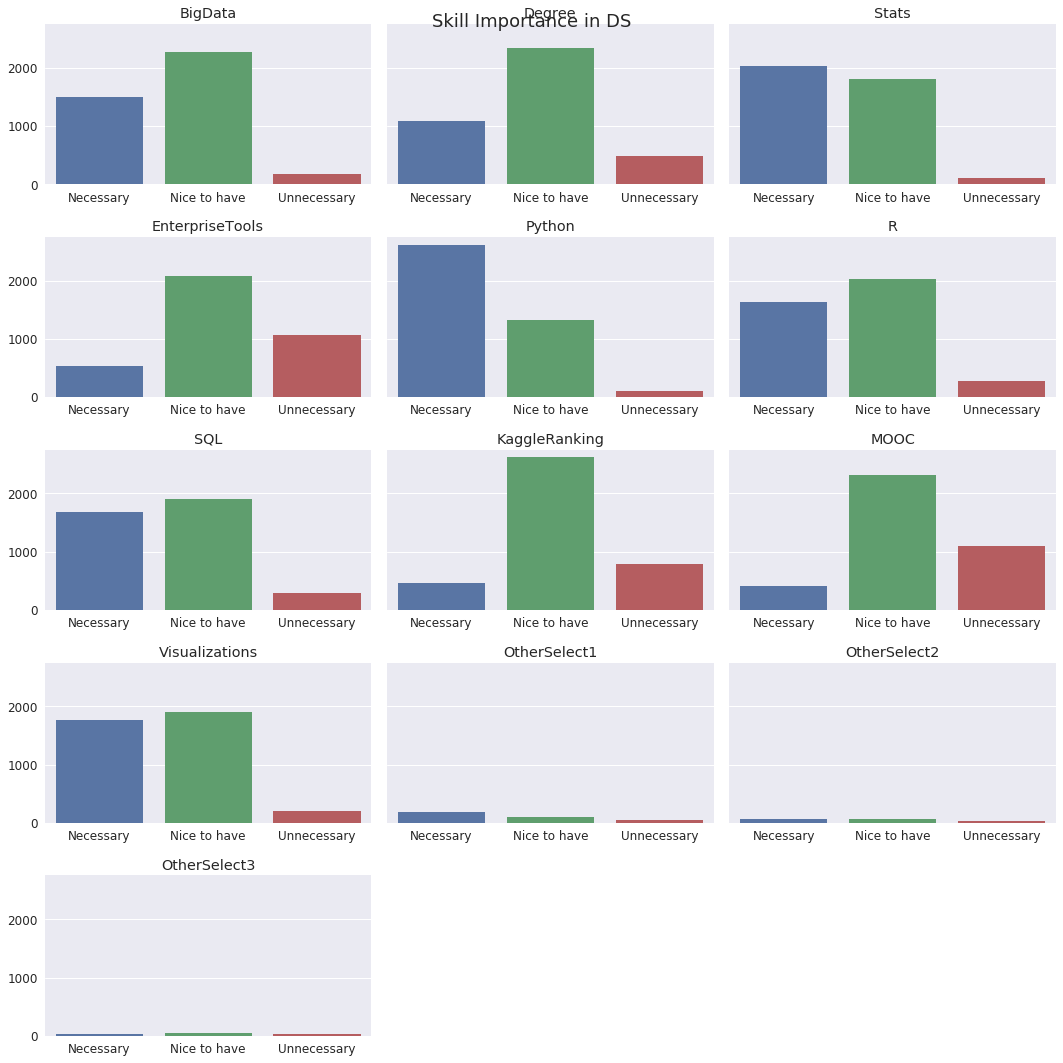

In [58]:
# Q. How important do you think the below skills or certifications are in getting a data science job?

#Selevct all columns that starts with "JobSkillImportance" but no the on that contain "FreeForm"
skill_cols = [col for col in multiChoice.columns if "JobSkillImportance" in col and 'FreeForm' not in col]

# Get a df for all these columns and drop any null values
skills = multiChoice[skill_cols]

# Plot each of the skills 
f, axs = plt.subplots(5,3, figsize=(15,15), sharey=True)
for i, skill in enumerate(skill_cols):
    skill_count = skills[skill].dropna().value_counts()
    skill_count = dict(zip(skill_count.index, skill_count.values))
    skill_count = dict(sorted(skill_count.items()))
    sns.barplot(x=list(skill_count.keys()),y=list(skill_count.values()), ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(skill[18:])

f.suptitle("Skill Importance in DS", fontsize=18)    
f.delaxes(axs[4][1])
f.delaxes(axs[4][2])
plt.tight_layout()
plt.show()

So, **Python, Stats and Visualizations** are the most necessary things for getting a job in the field of DS while it's good if you have a **Kaggle Ranking**, a **degree** or **knowledge of R**

More to come soon!! Any suggestions/feedback would be highly appreciated. Also, don't forget to **upvote** this kernel if you liked it or found it useful in anyway.